In [81]:
import sys
sys.path.insert(1,"../src")
import pandas as pd
import matplotlib.pyplot as plt
import util
import GA_util
import tensorflow as tf
import keras as tfk
import numpy as np
tfkl = tf.keras.layers

In [92]:
import os
os.getcwd()

'/Users/aidanriley/Dropbox/Final GARDN Code_11_20/aptamer'

In [82]:
MASTER_PART = pd.read_excel('data/aptaswitch_data.xlsx',sheet_name='high_throughput')

In [83]:
MASTER_PART.shape

(384, 28)

In [84]:
target_on = 'ADJ_ON'
target_off = 'ADJ_OFF'

(array([192., 106.,  64.,  14.,   3.,   2.,   2.,   0.,   0.,   1.]),
 array([5.54312600e+00, 6.45349363e+02, 1.28515560e+03, 1.92496184e+03,
        2.56476808e+03, 3.20457431e+03, 3.84438055e+03, 4.48418679e+03,
        5.12399303e+03, 5.76379926e+03, 6.40360550e+03]),
 <BarContainer object of 10 artists>)

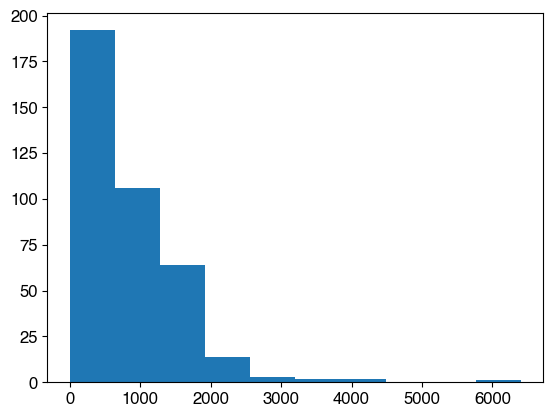

In [85]:
plt.hist(MASTER_PART[target_on])

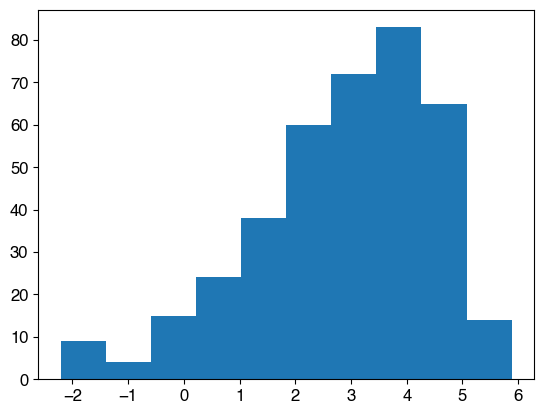

In [94]:
from sklearn.preprocessing import MinMaxScaler

# scaler_on = MinMaxScaler()
# scaler_off = MinMaxScaler()

# scaled_ON = scaler_on.fit_transform(MASTER_PART[target_on].values.reshape(-1,1))
# scaled_OFF = scaler_off.fit_transform(MASTER_PART[target_off].values.reshape(-1,1))

# y = scaled_ON - scaled_OFF

y = np.log(MASTER_PART[target_on]) - np.log(MASTER_PART[target_off])
# plt.hist(y)
# # y = MASTER_PART[target_on] 
# y = MASTER_PART['ADJ_ON_OFF']
y = y.values.reshape(-1,1)

scaler_on_off = MinMaxScaler()

y = scaler_on_off.fit_transform(y)

(384, 4, 137)
(384, 4, 137)


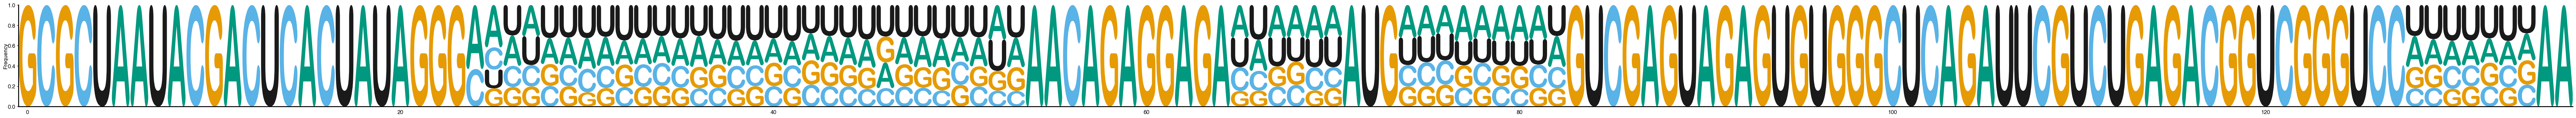

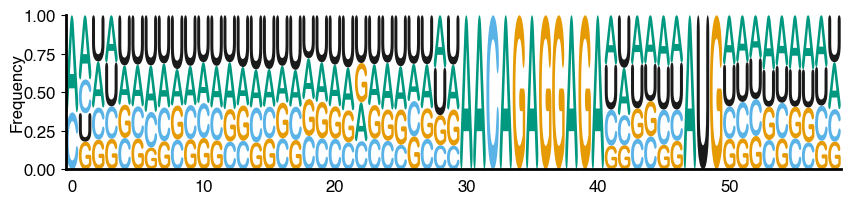

In [95]:
import numpy as np

seqs = util.one_hot_encode(MASTER_PART[['SWITCH']])
print(seqs.shape)
util.plot_logo(seqs,figsize=[100,4])

print(seqs.shape)
ppms = GA_util.prototype_ppms_fast(seqs)


util.plot_logo(seqs[:,:,24:24+59])

In [96]:
from keras import backend as K

#Training settings
EPOCHS = 1000
LOSS = 'mse'
LR_1 = 0.00005
# LR_2 = 0.00001
# LR_3 = 0.0001
OPT = tfk.optimizers.legacy.Adam(learning_rate=LR_1)
BATCH_SIZE = 8
PATIENCE = 10 #
# 

cb = tfk.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE,restore_best_weights=True)
TEST_SIZE = 35
LATENT_DIM = 32
PRETRAIN = False
FOLDS = 100
VERBOSE = False

# pretrained_model = tfk.models.load_model('../SANDSTORM/tmp_models/sandstorm_apta_pretrained')

# K.set_value(pretrained_model.optimizer.learning_rate,LR_1)


In [97]:
indices = np.arange(0,seqs.shape[0])

Model:  32
Training Fold 1
2/2 [==============================] - 0s 2ms/step


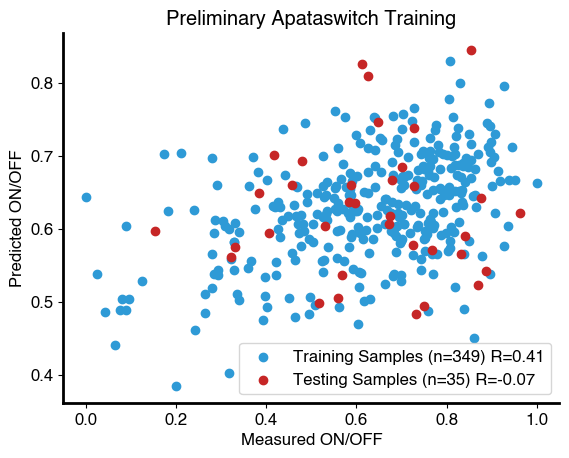

Elapsed Time: 8.367887020111084
Training Fold 2
2/2 [==============================] - 0s 2ms/step


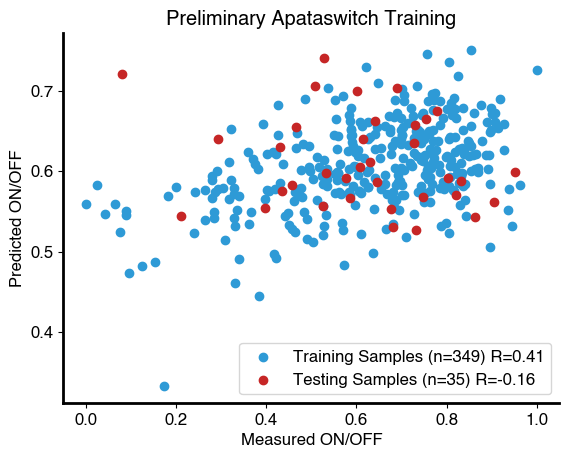

Elapsed Time: 5.0288121700286865
Training Fold 3
2/2 [==============================] - 0s 2ms/step


/opt/homebrew/Caskroom/miniforge/base/envs/codon/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


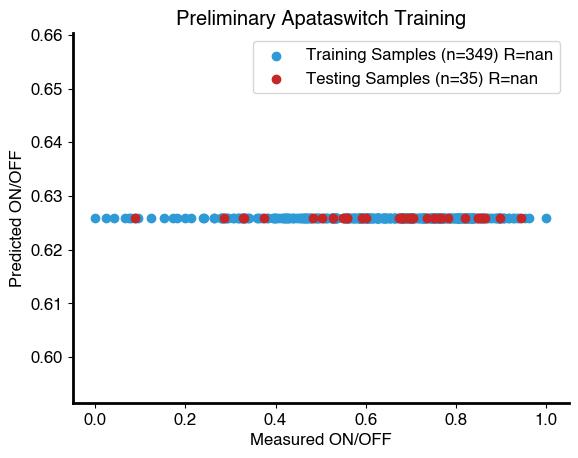

Elapsed Time: 87.28996205329895
Training Fold 4
2/2 [==============================] - 0s 1ms/step


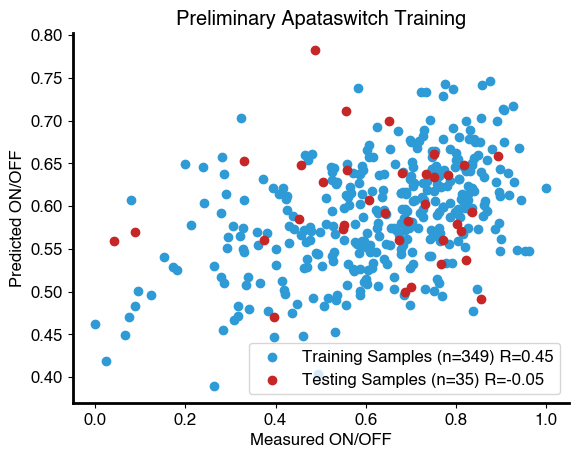

Elapsed Time: 4.8883421421051025
Training Fold 5
2/2 [==============================] - 0s 1ms/step


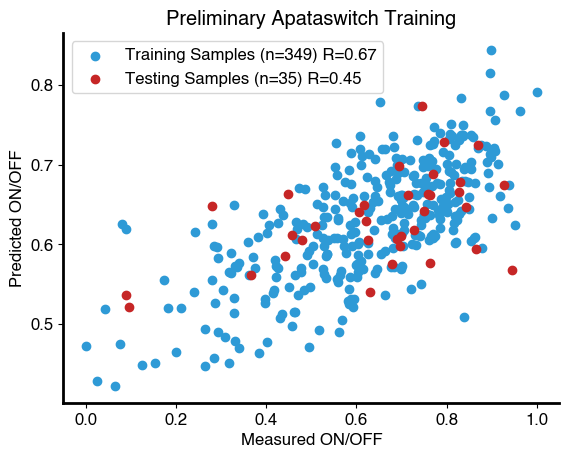

Elapsed Time: 26.85162091255188
Training Fold 6
2/2 [==============================] - 0s 1ms/step


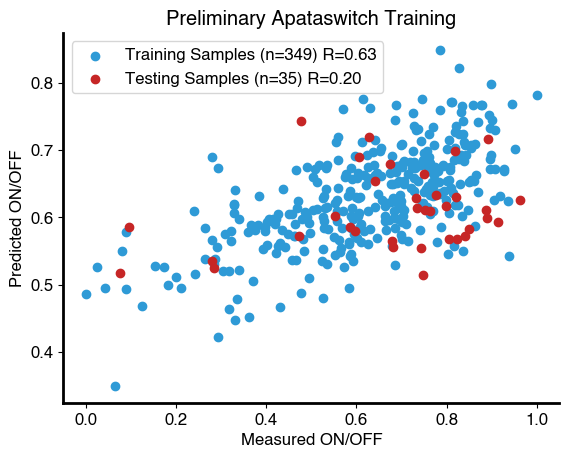

Elapsed Time: 8.942350149154663
Training Fold 7
2/2 [==============================] - 0s 1ms/step


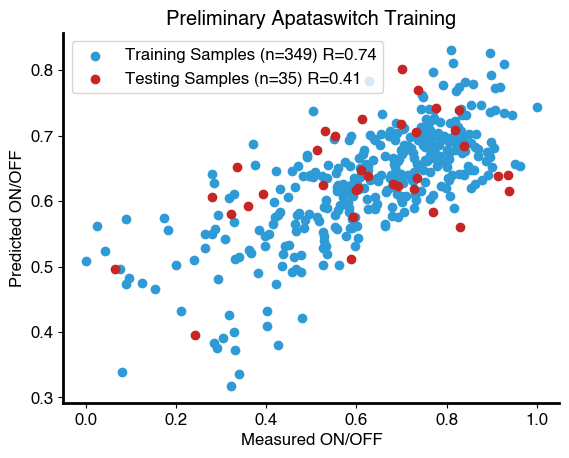

Elapsed Time: 24.812241077423096
Training Fold 8
2/2 [==============================] - 0s 1ms/step


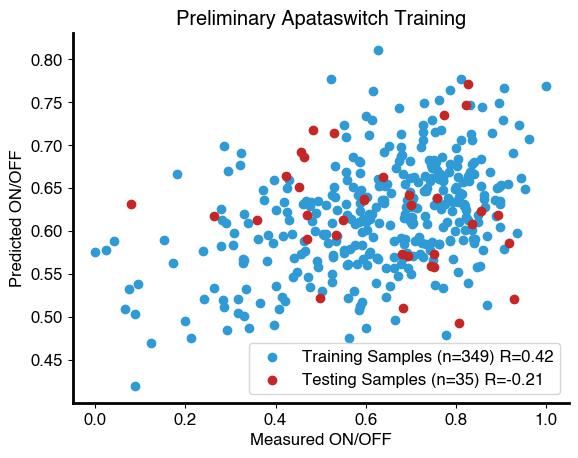

Elapsed Time: 5.0839807987213135
Training Fold 9
2/2 [==============================] - 0s 1ms/step


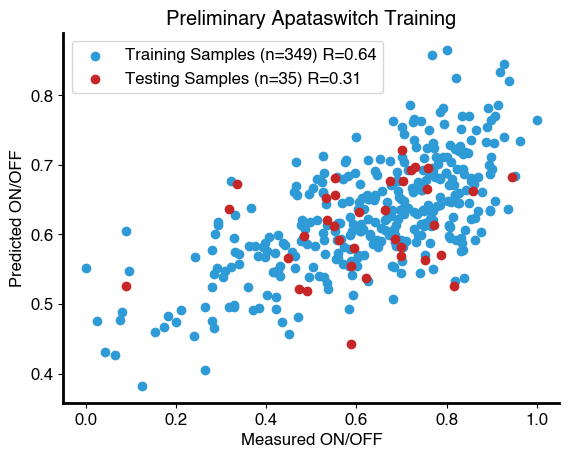

Elapsed Time: 7.382093906402588
Training Fold 10
2/2 [==============================] - 0s 1ms/step


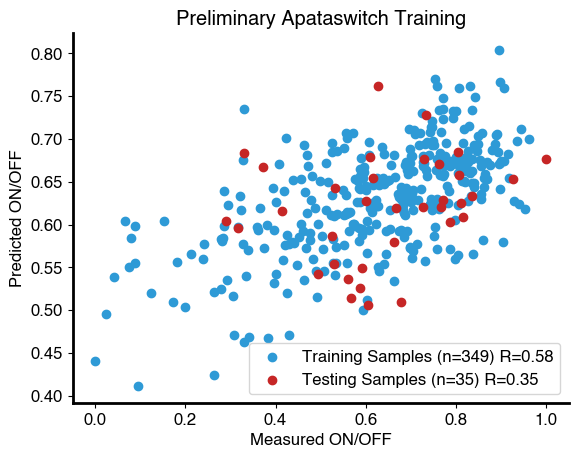

Elapsed Time: 7.926201105117798
Training Fold 11
2/2 [==============================] - 0s 1ms/step


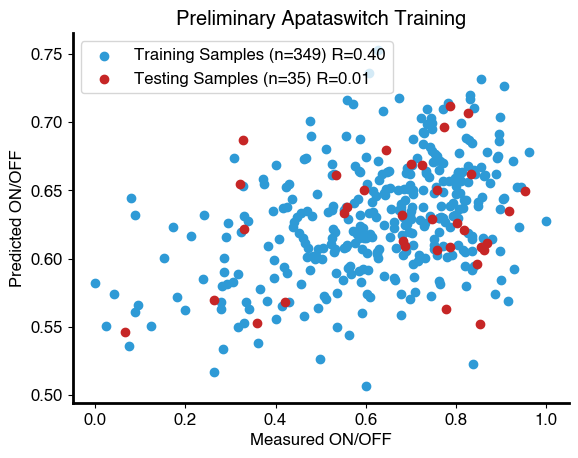

Elapsed Time: 7.0203471183776855
Training Fold 12
2/2 [==============================] - 0s 1ms/step


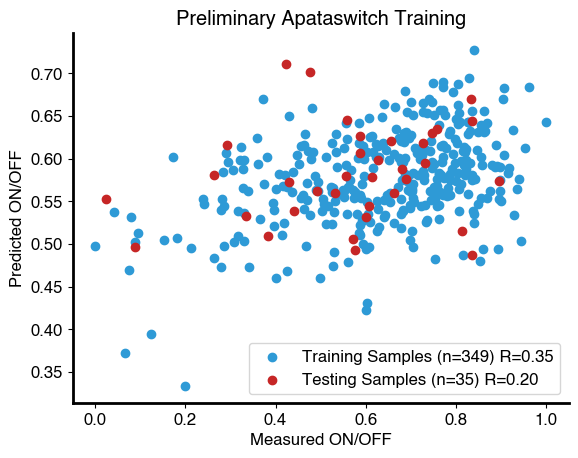

Elapsed Time: 4.716857194900513
Training Fold 13
2/2 [==============================] - 0s 1ms/step


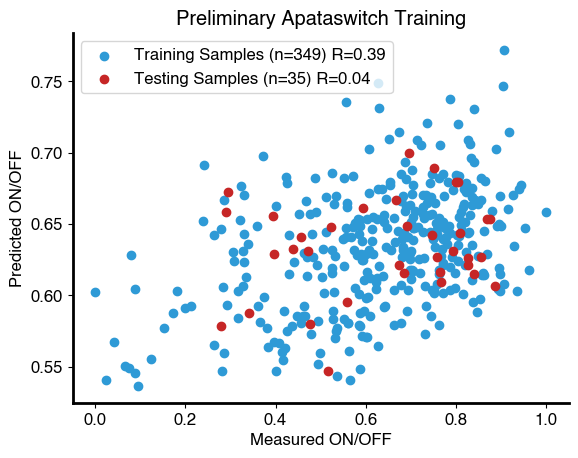

Elapsed Time: 12.208513736724854
Training Fold 14
2/2 [==============================] - 0s 1ms/step


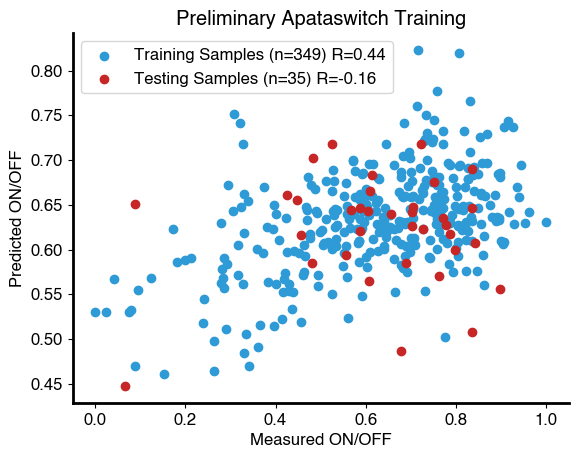

Elapsed Time: 5.502292156219482
Training Fold 15
2/2 [==============================] - 0s 1ms/step


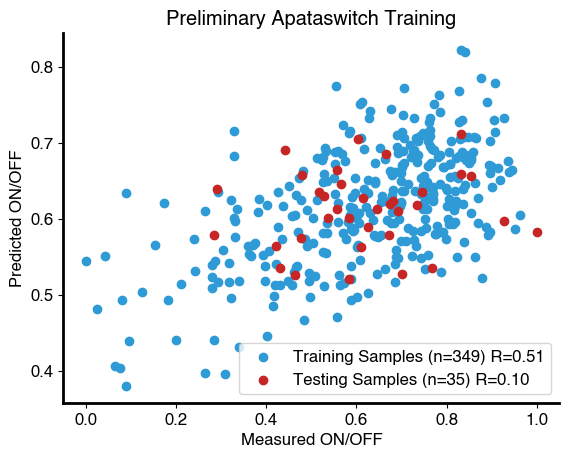

Elapsed Time: 6.120117902755737
Training Fold 16
2/2 [==============================] - 0s 2ms/step


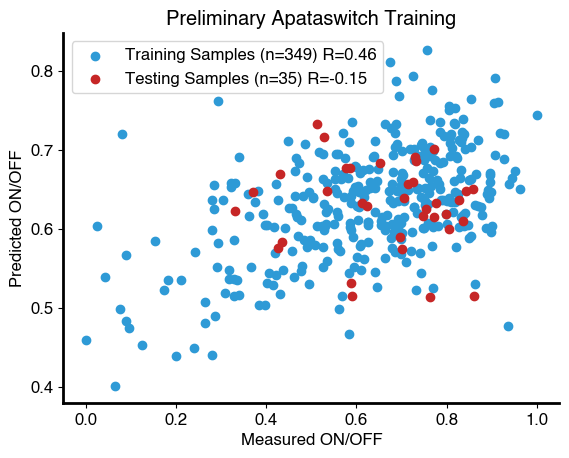

Elapsed Time: 7.2996110916137695
Training Fold 17
2/2 [==============================] - 0s 1ms/step


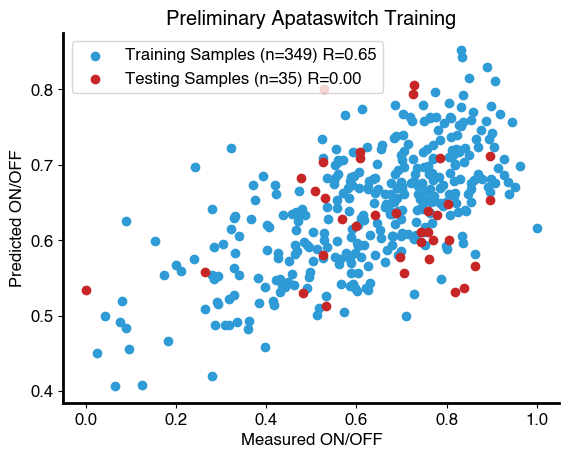

Elapsed Time: 7.441679000854492
Training Fold 18
2/2 [==============================] - 0s 1ms/step


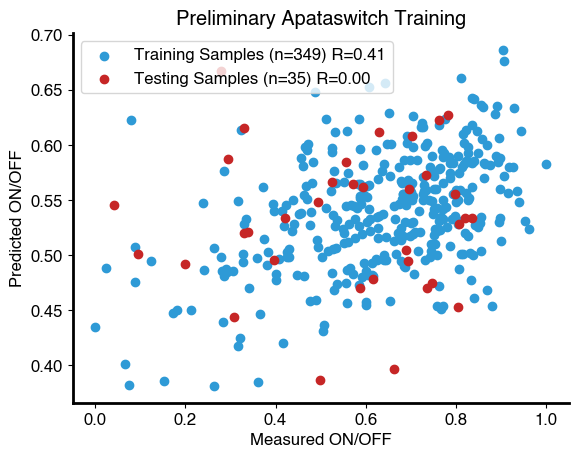

Elapsed Time: 4.453078031539917
Training Fold 19
2/2 [==============================] - 0s 2ms/step


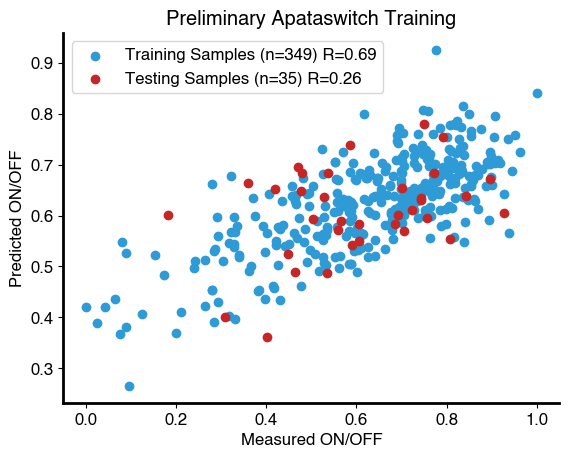

Elapsed Time: 11.095183849334717
Training Fold 20
2/2 [==============================] - 0s 2ms/step


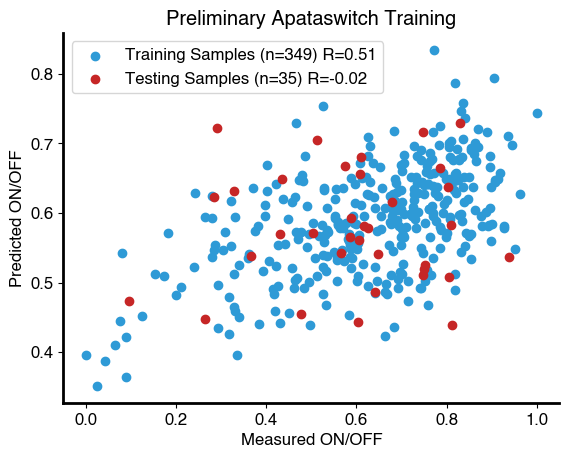

Elapsed Time: 4.383908748626709
Training Fold 21
2/2 [==============================] - 0s 1ms/step


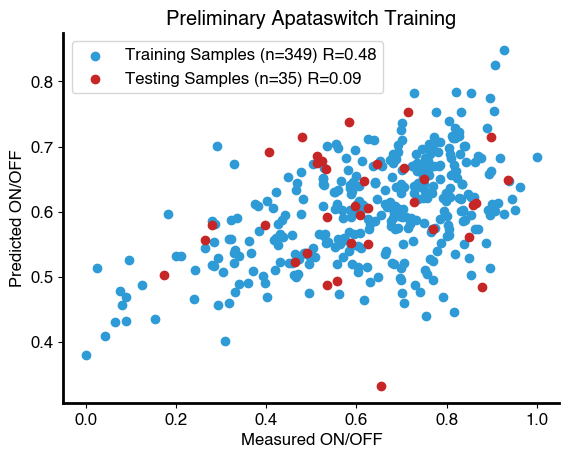

Elapsed Time: 5.052700042724609
Training Fold 22
2/2 [==============================] - 0s 1ms/step


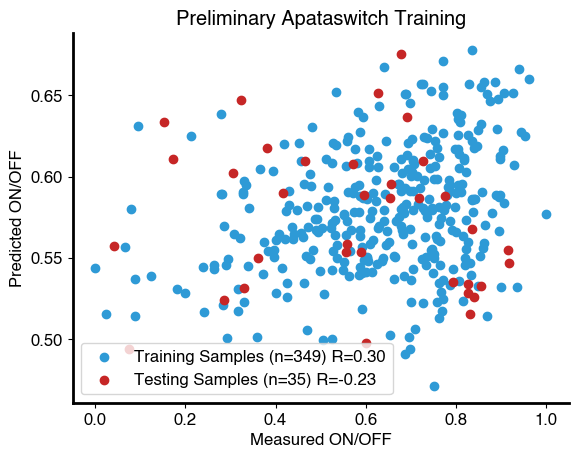

Elapsed Time: 4.7271177768707275
Training Fold 23
2/2 [==============================] - 0s 1ms/step


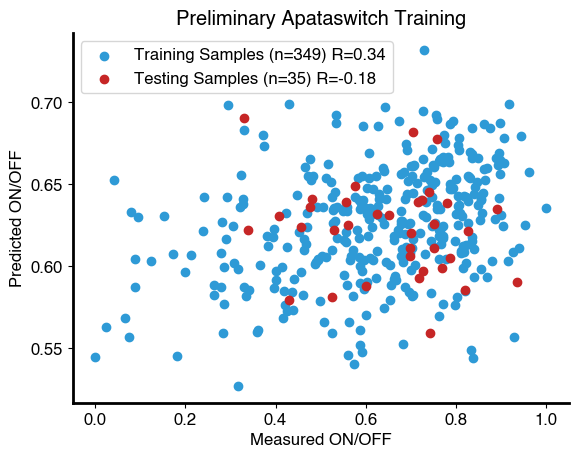

Elapsed Time: 6.234286069869995
Training Fold 24
2/2 [==============================] - 0s 2ms/step


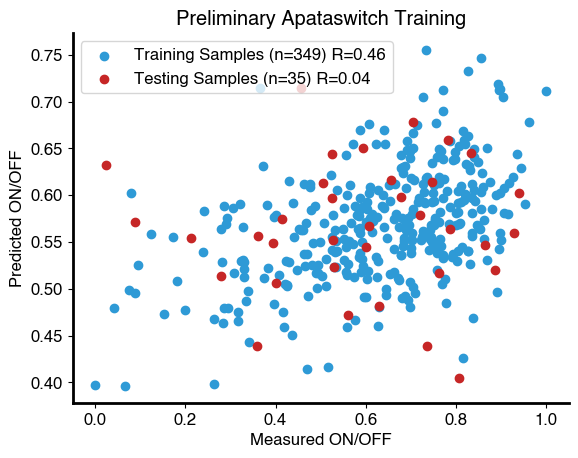

Elapsed Time: 4.6677000522613525
Training Fold 25
2/2 [==============================] - 0s 1ms/step


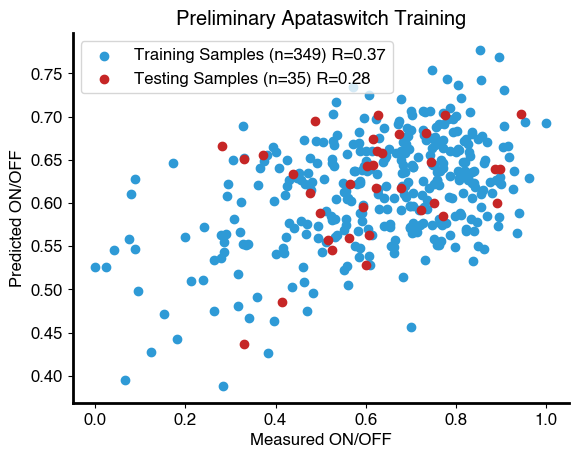

Elapsed Time: 5.840292692184448
Training Fold 26
2/2 [==============================] - 0s 1ms/step


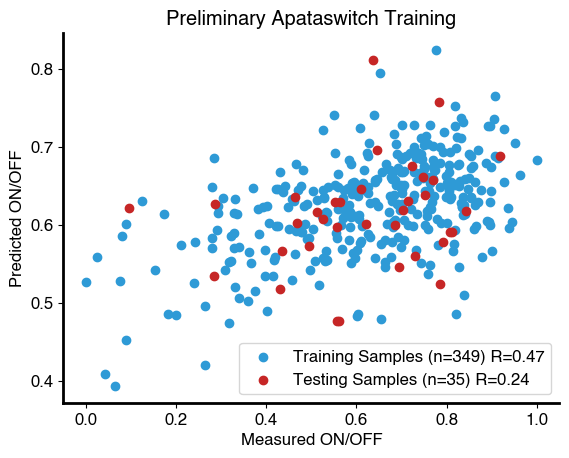

Elapsed Time: 7.389688014984131
Training Fold 27
2/2 [==============================] - 0s 1ms/step


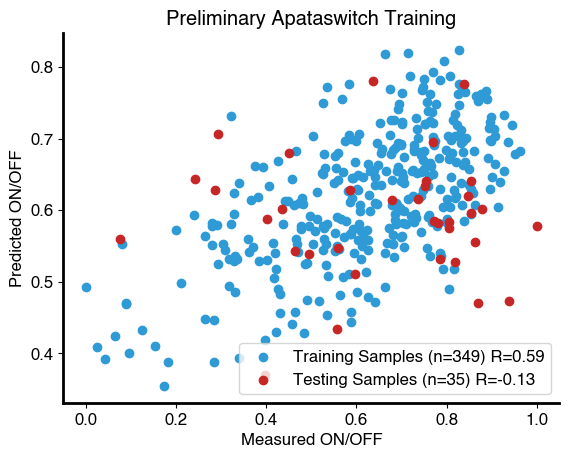

Elapsed Time: 5.3673460483551025
Training Fold 28
2/2 [==============================] - 0s 1ms/step


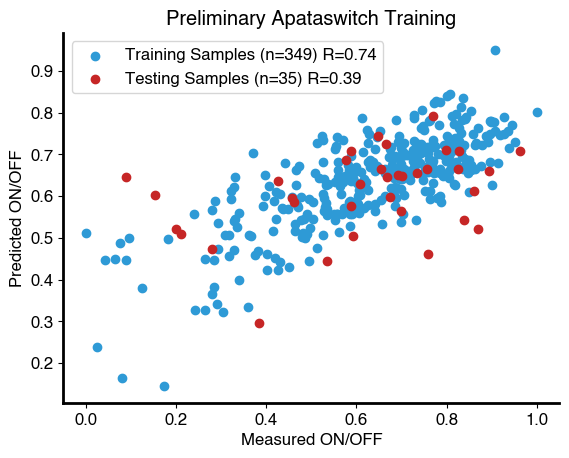

Elapsed Time: 11.398928880691528
Training Fold 29
2/2 [==============================] - 0s 1ms/step


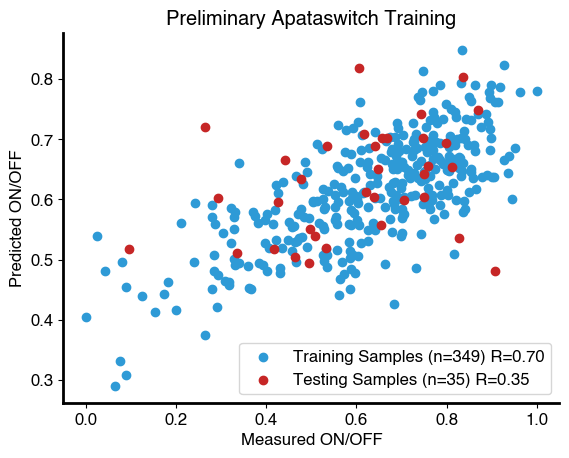

Elapsed Time: 8.861522197723389
Training Fold 30
2/2 [==============================] - 0s 1ms/step


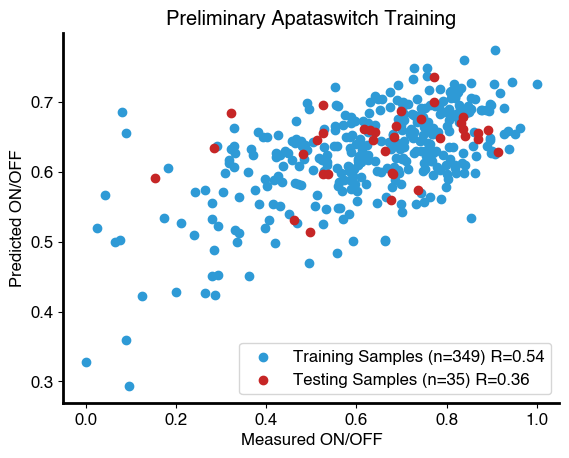

Elapsed Time: 9.196583986282349
Training Fold 31
2/2 [==============================] - 0s 2ms/step


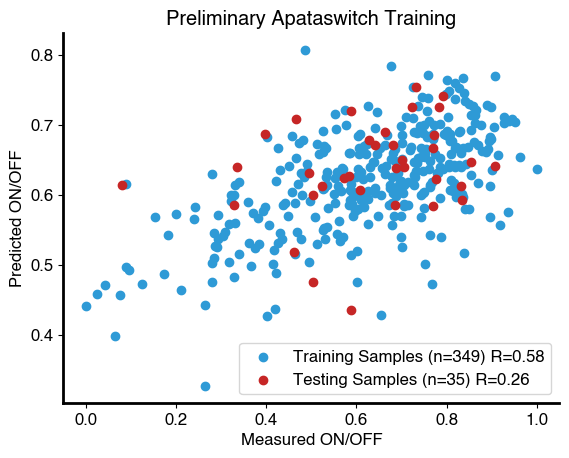

Elapsed Time: 7.234982967376709
Training Fold 32
2/2 [==============================] - 0s 1ms/step


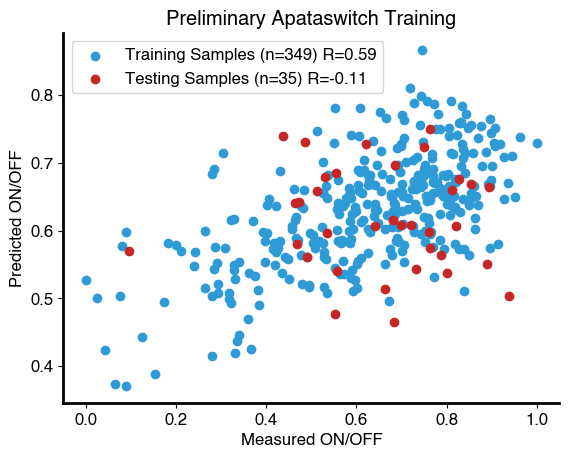

Elapsed Time: 6.535351037979126
Training Fold 33
2/2 [==============================] - 0s 1ms/step


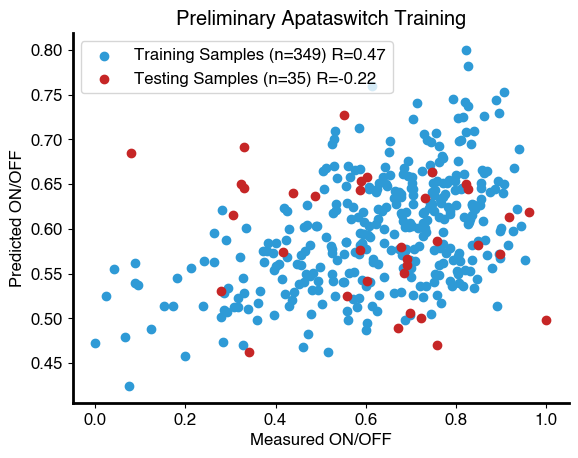

Elapsed Time: 4.923752069473267
Training Fold 34
2/2 [==============================] - 0s 1ms/step


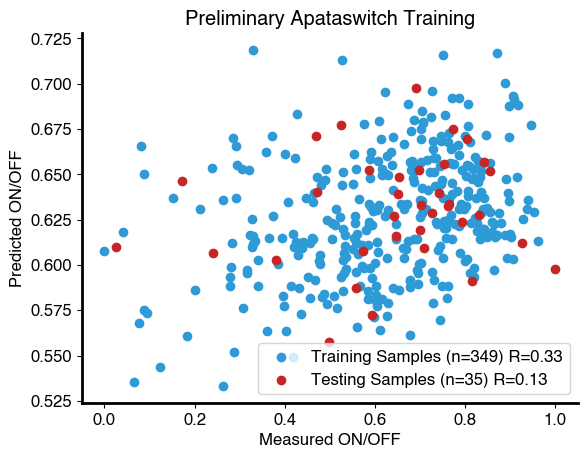

Elapsed Time: 6.2115700244903564
Training Fold 35
2/2 [==============================] - 0s 1ms/step


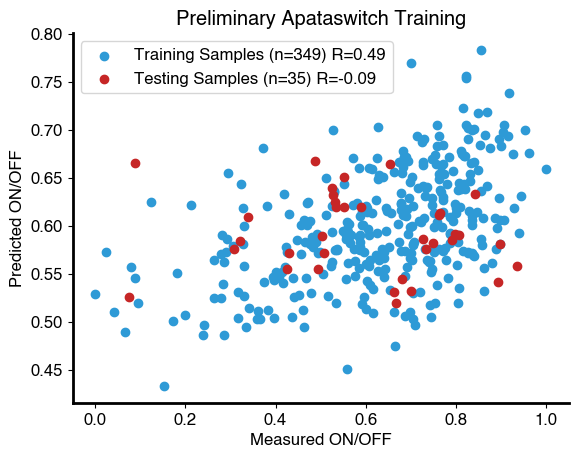

Elapsed Time: 5.217535018920898
Training Fold 36
2/2 [==============================] - 0s 1ms/step


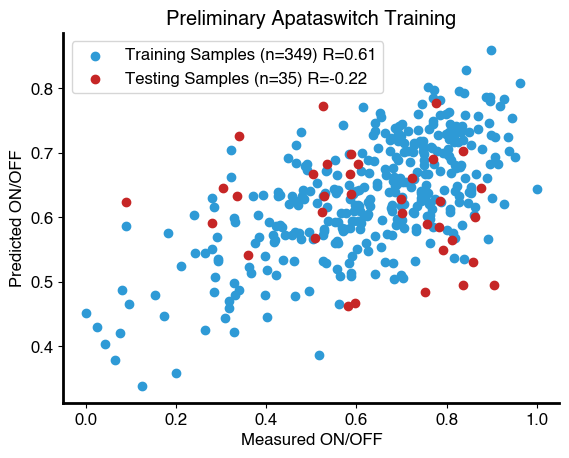

Elapsed Time: 7.836485147476196
Training Fold 37
2/2 [==============================] - 0s 2ms/step


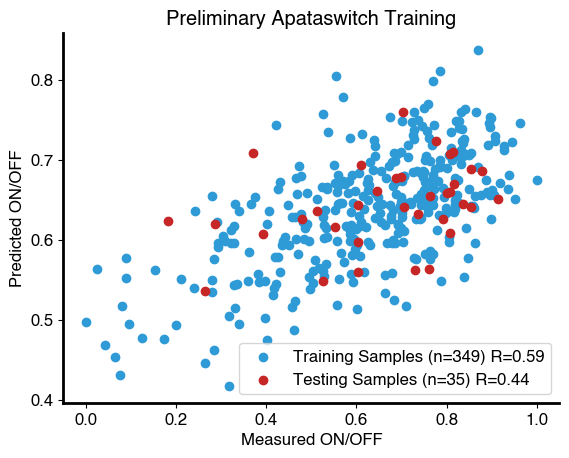

Elapsed Time: 10.291197061538696
Training Fold 38
2/2 [==============================] - 0s 1ms/step


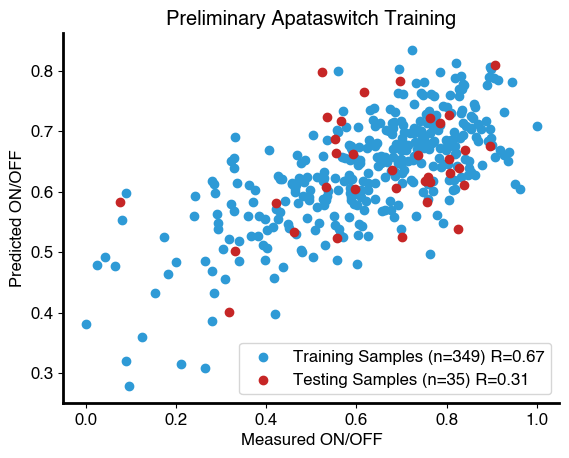

Elapsed Time: 8.288618803024292
Training Fold 39
2/2 [==============================] - 0s 1ms/step


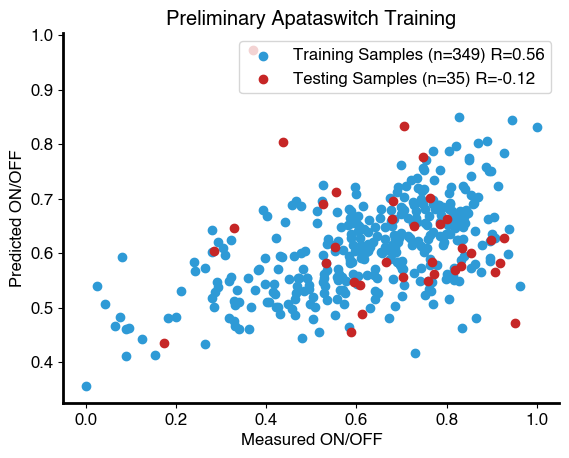

Elapsed Time: 5.819583892822266
Training Fold 40
2/2 [==============================] - 0s 2ms/step


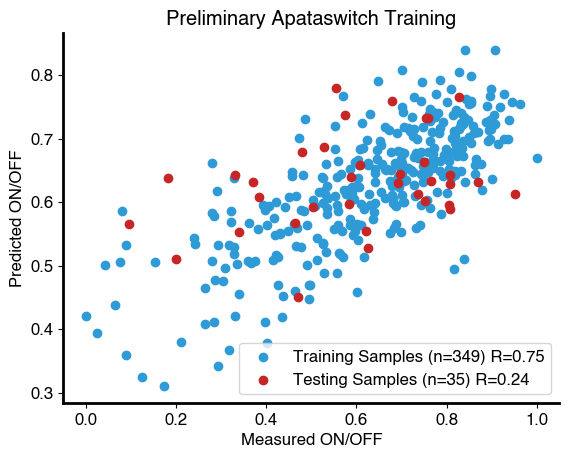

Elapsed Time: 20.640822887420654
Training Fold 41
2/2 [==============================] - 0s 2ms/step


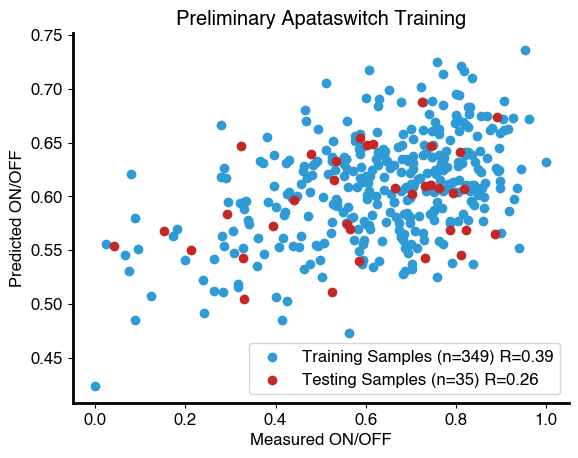

Elapsed Time: 4.835787057876587
Training Fold 42
2/2 [==============================] - 0s 1ms/step


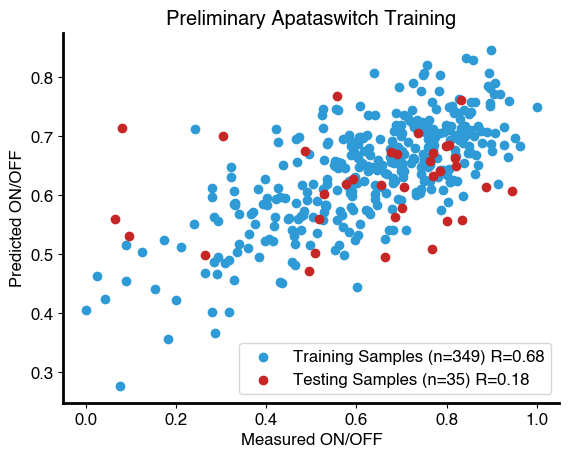

Elapsed Time: 10.644354820251465
Training Fold 43
2/2 [==============================] - 0s 1ms/step


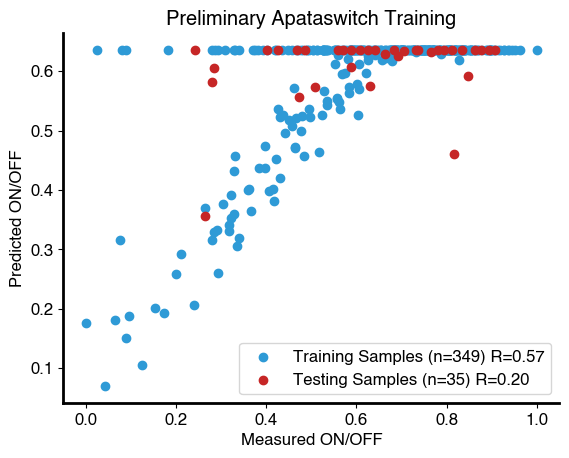

Elapsed Time: 61.49152207374573
Training Fold 44
2/2 [==============================] - 0s 1ms/step


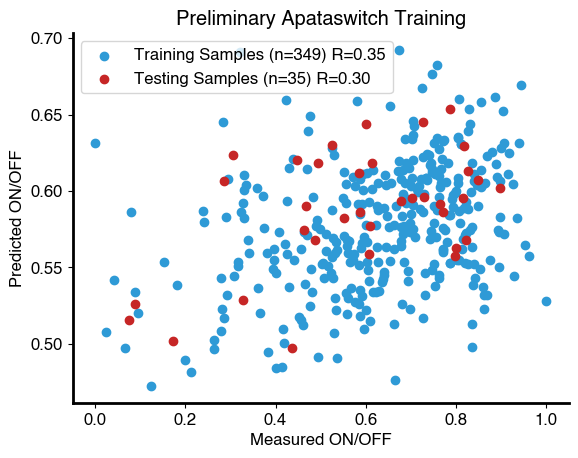

Elapsed Time: 4.567791223526001
Training Fold 45
2/2 [==============================] - 0s 1ms/step


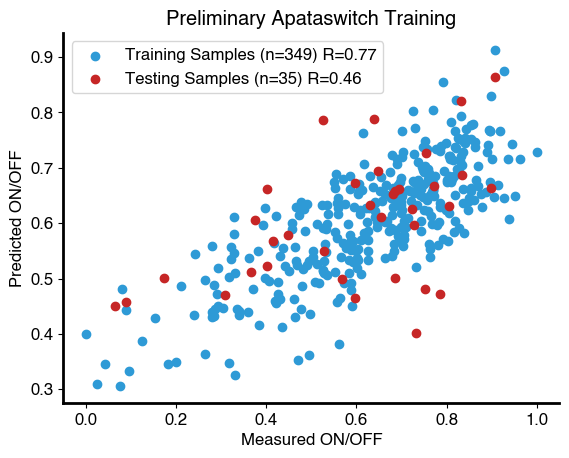

Elapsed Time: 11.692977905273438
Training Fold 46
2/2 [==============================] - 0s 1ms/step


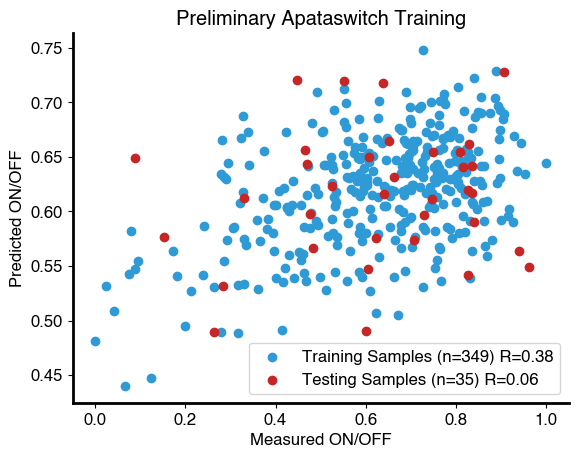

Elapsed Time: 5.148530960083008
Training Fold 47
2/2 [==============================] - 0s 1ms/step


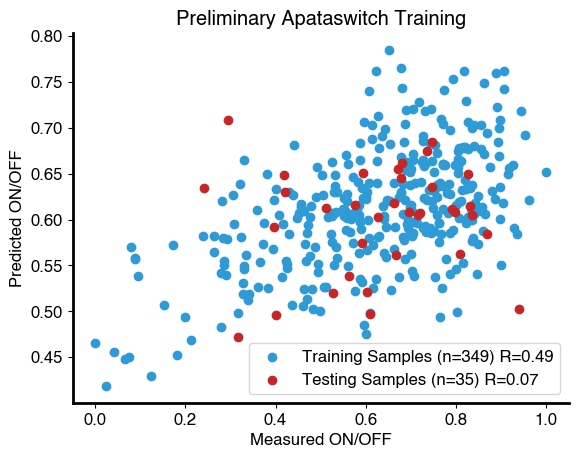

Elapsed Time: 5.364240884780884
Training Fold 48
2/2 [==============================] - 0s 1ms/step


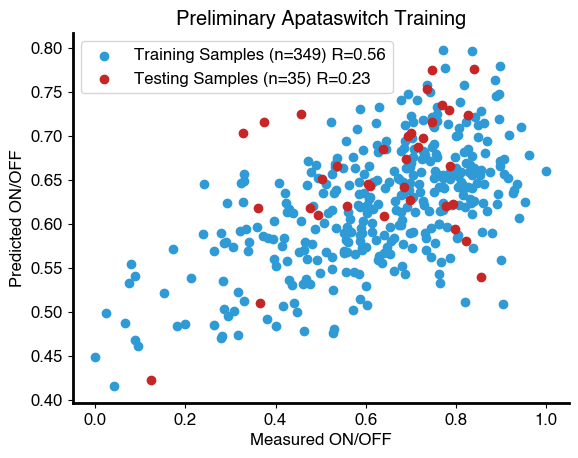

Elapsed Time: 7.255465984344482
Training Fold 49
2/2 [==============================] - 0s 2ms/step


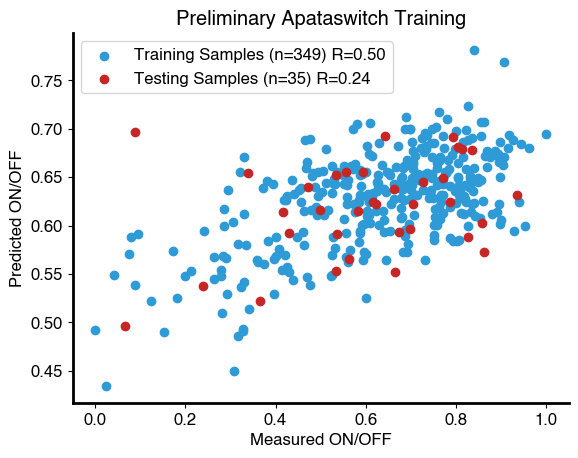

Elapsed Time: 9.3818838596344
Training Fold 50
2/2 [==============================] - 0s 1ms/step


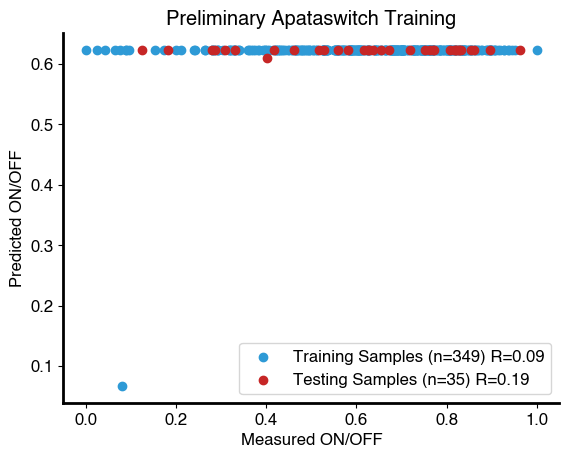

Elapsed Time: 68.05988574028015
Training Fold 51
2/2 [==============================] - 0s 1ms/step


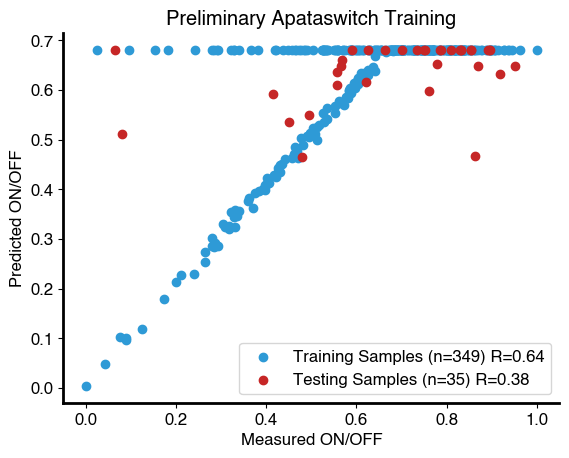

Elapsed Time: 72.75809907913208
Training Fold 52
2/2 [==============================] - 0s 2ms/step


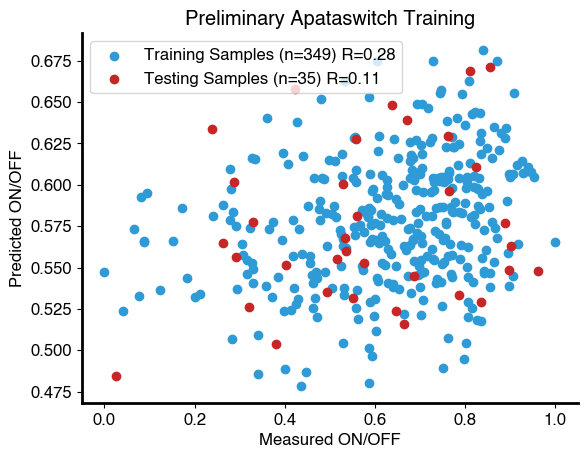

Elapsed Time: 4.5700390338897705
Training Fold 53
2/2 [==============================] - 0s 1ms/step


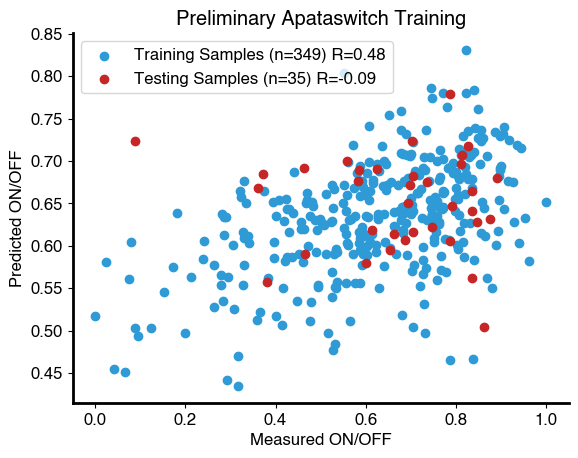

Elapsed Time: 5.748207092285156
Training Fold 54
2/2 [==============================] - 0s 2ms/step


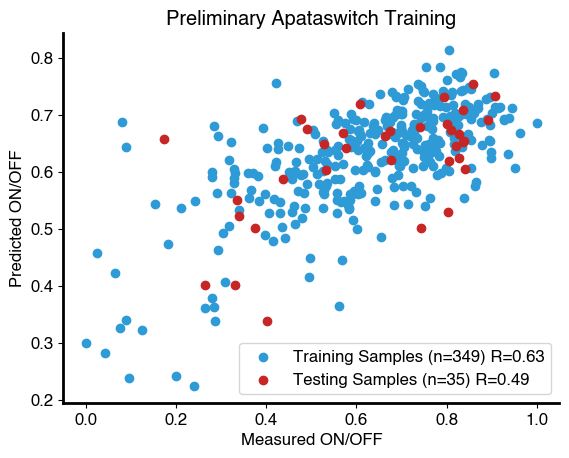

Elapsed Time: 14.954214096069336
Training Fold 55
2/2 [==============================] - 0s 1ms/step


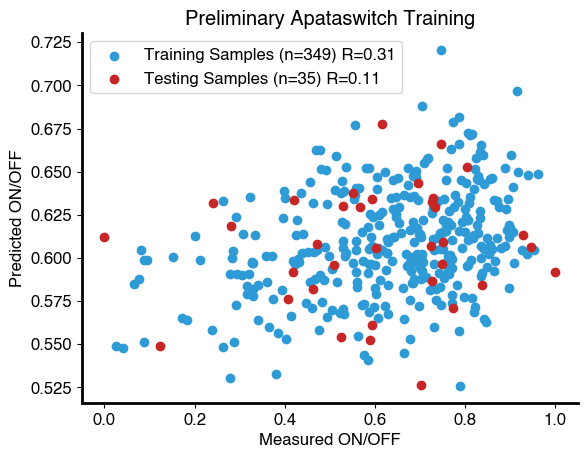

Elapsed Time: 4.970045804977417
Training Fold 56
2/2 [==============================] - 0s 2ms/step


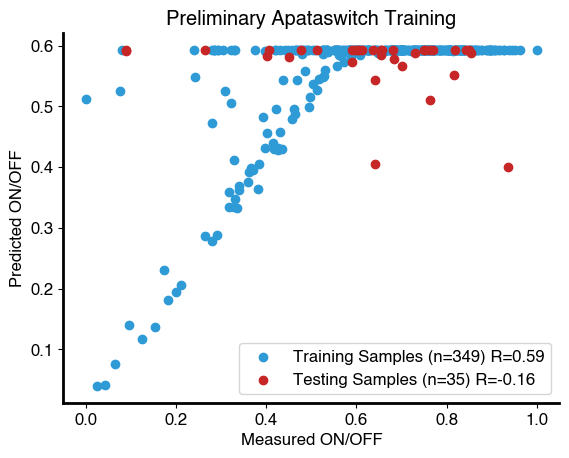

Elapsed Time: 53.09803009033203
Training Fold 57
2/2 [==============================] - 0s 1ms/step


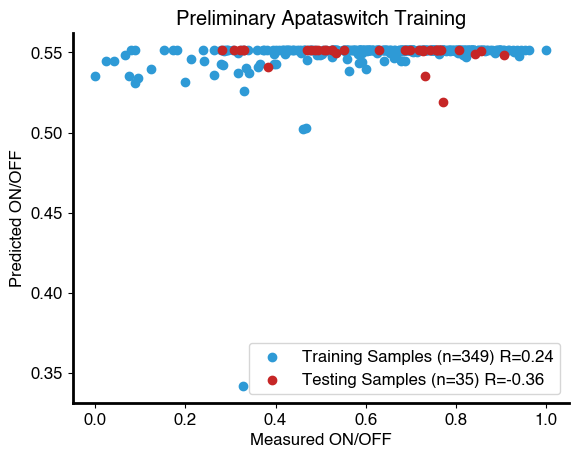

Elapsed Time: 49.49904990196228
Training Fold 58
2/2 [==============================] - 0s 2ms/step


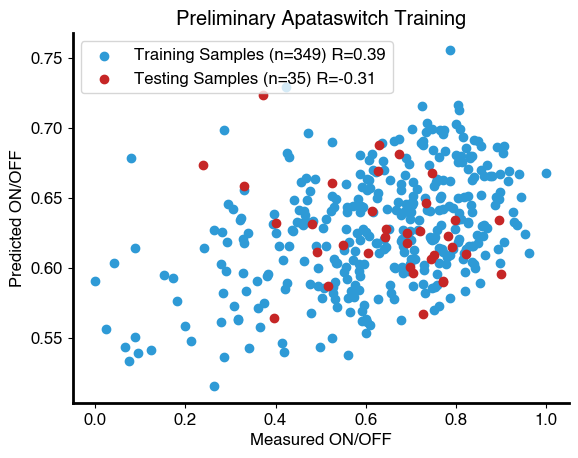

Elapsed Time: 6.256828308105469
Training Fold 59
2/2 [==============================] - 0s 1ms/step


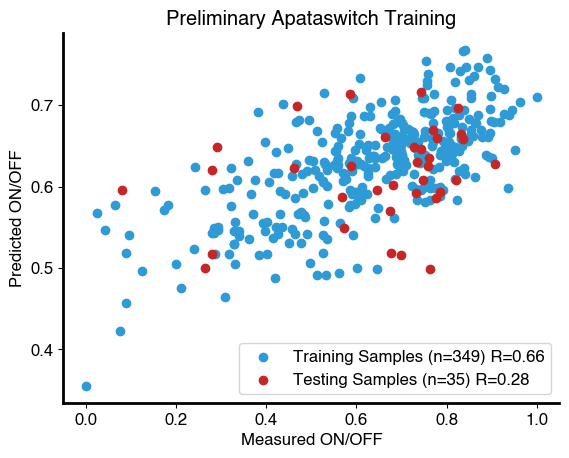

Elapsed Time: 11.173020124435425
Training Fold 60
2/2 [==============================] - 0s 1ms/step


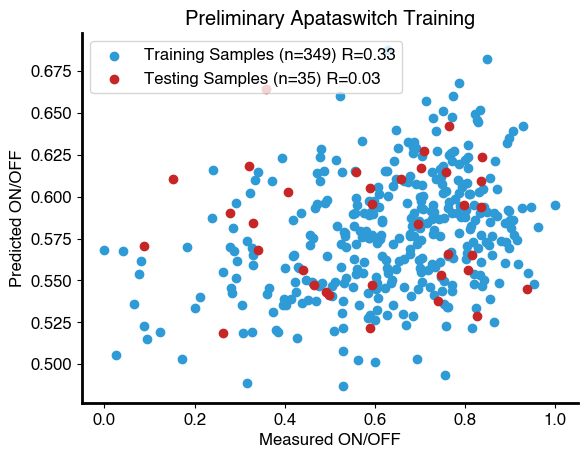

Elapsed Time: 4.784492254257202
Training Fold 61
2/2 [==============================] - 0s 1ms/step


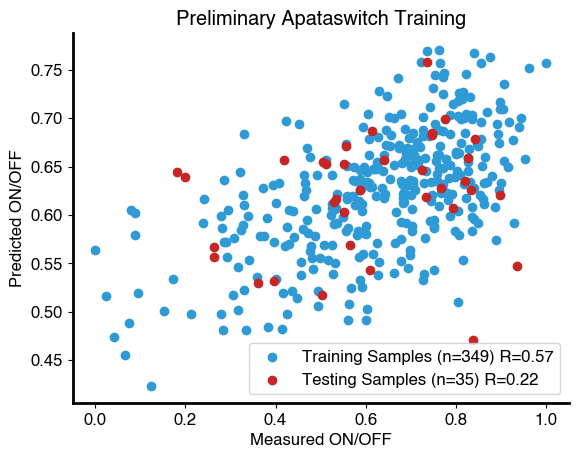

Elapsed Time: 11.951859951019287
Training Fold 62
2/2 [==============================] - 0s 2ms/step


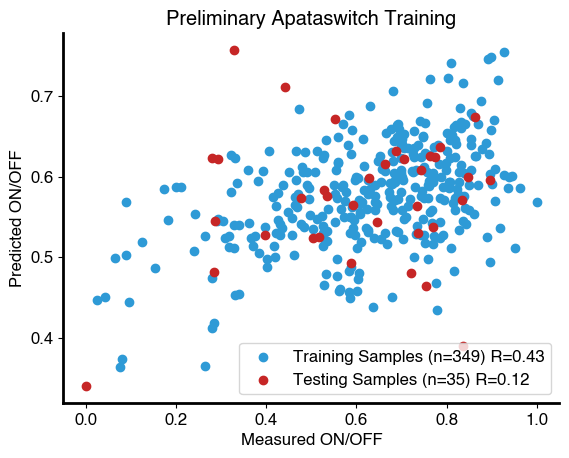

Elapsed Time: 4.63455605506897
Training Fold 63
2/2 [==============================] - 0s 1ms/step


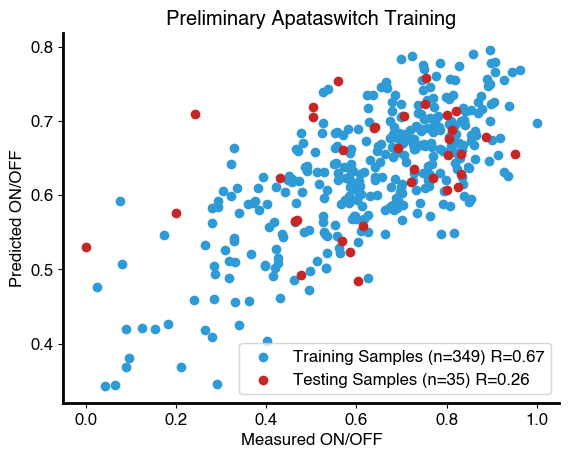

Elapsed Time: 14.015491962432861
Training Fold 64
2/2 [==============================] - 0s 1ms/step


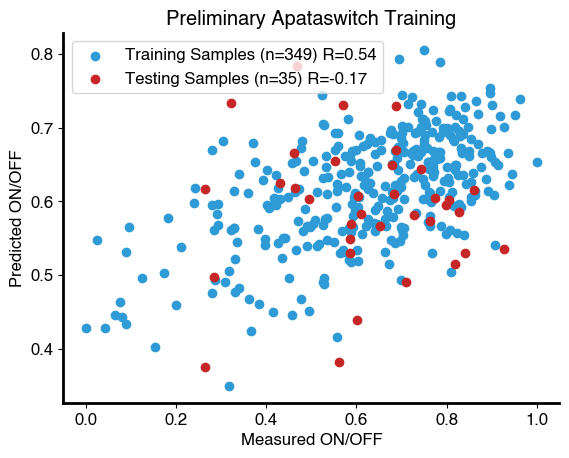

Elapsed Time: 5.351030111312866
Training Fold 65
2/2 [==============================] - 0s 1ms/step


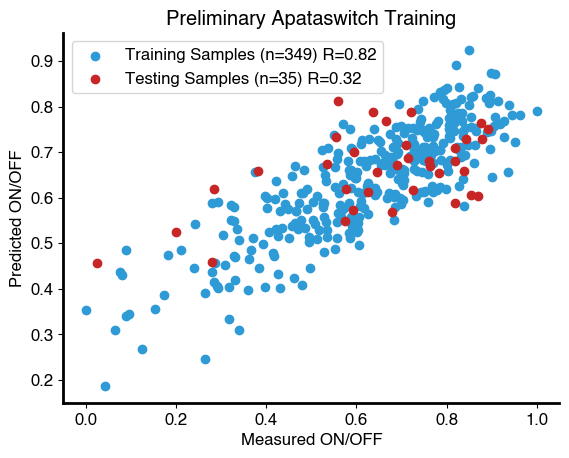

Elapsed Time: 10.816925048828125
Training Fold 66
2/2 [==============================] - 0s 2ms/step


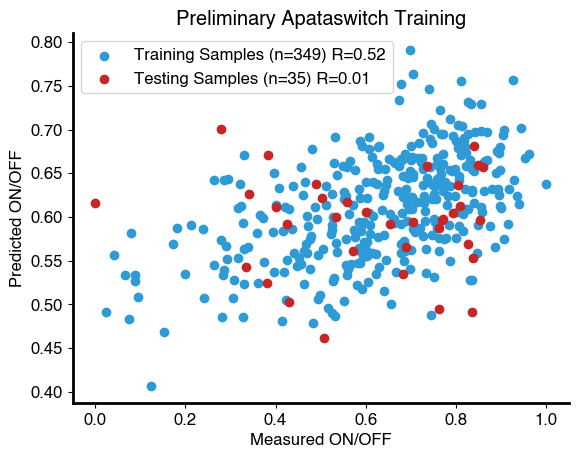

Elapsed Time: 4.996711254119873
Training Fold 67
2/2 [==============================] - 0s 2ms/step


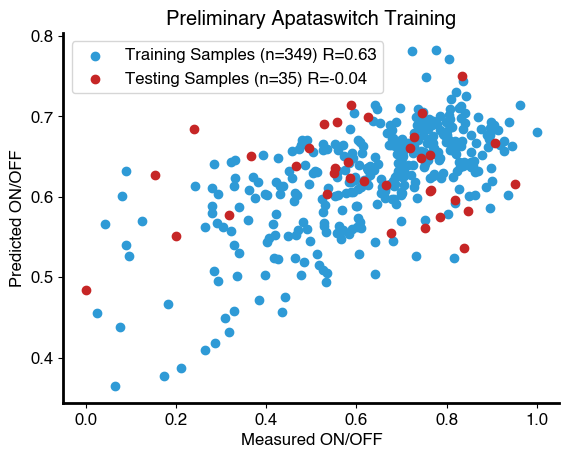

Elapsed Time: 14.0750892162323
Training Fold 68
2/2 [==============================] - 0s 1ms/step


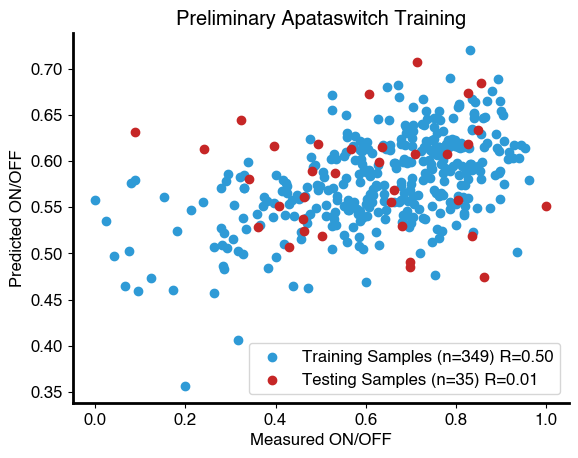

Elapsed Time: 4.732064723968506
Training Fold 69
2/2 [==============================] - 0s 2ms/step


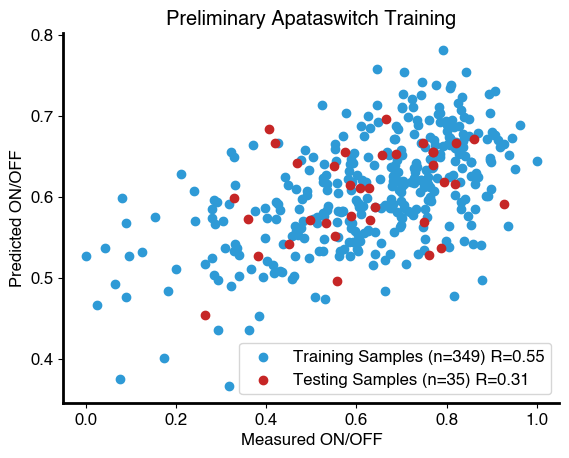

Elapsed Time: 5.221324920654297
Training Fold 70
2/2 [==============================] - 0s 1ms/step


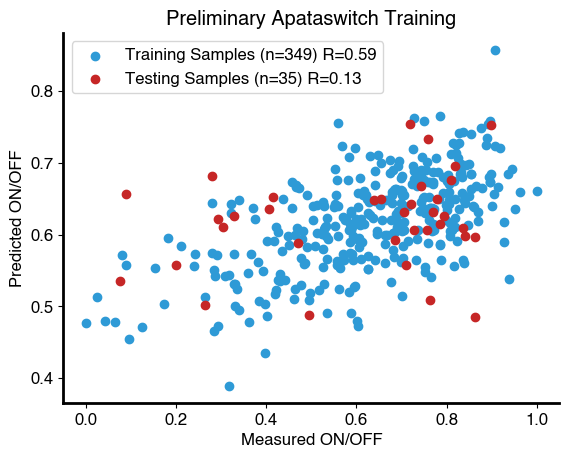

Elapsed Time: 8.55035400390625
Training Fold 71
2/2 [==============================] - 0s 1ms/step


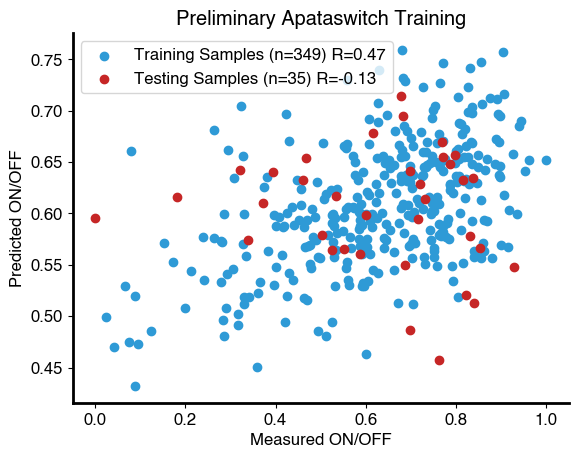

Elapsed Time: 5.295850992202759
Training Fold 72
2/2 [==============================] - 0s 2ms/step


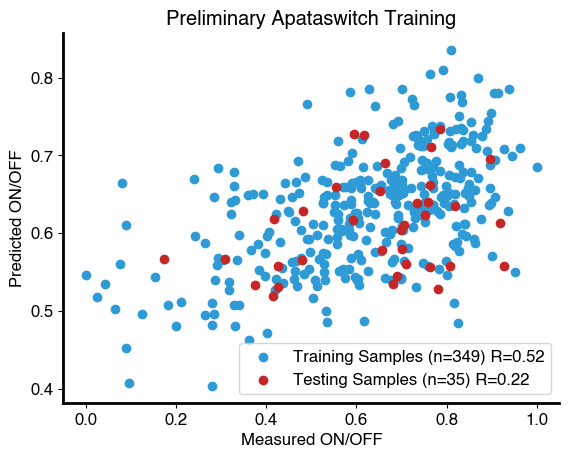

Elapsed Time: 6.588259220123291
Training Fold 73
2/2 [==============================] - 0s 2ms/step


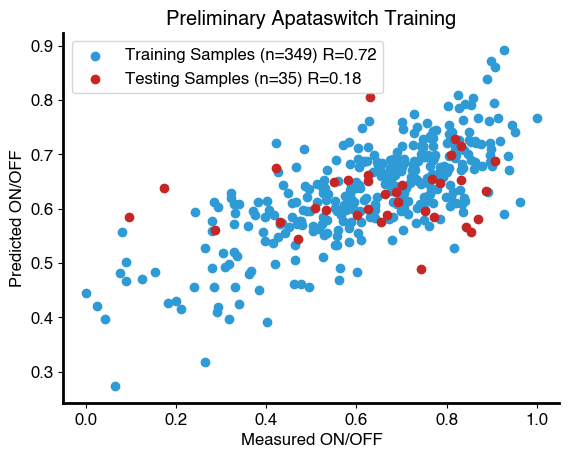

Elapsed Time: 14.838395833969116
Training Fold 74
2/2 [==============================] - 0s 1ms/step


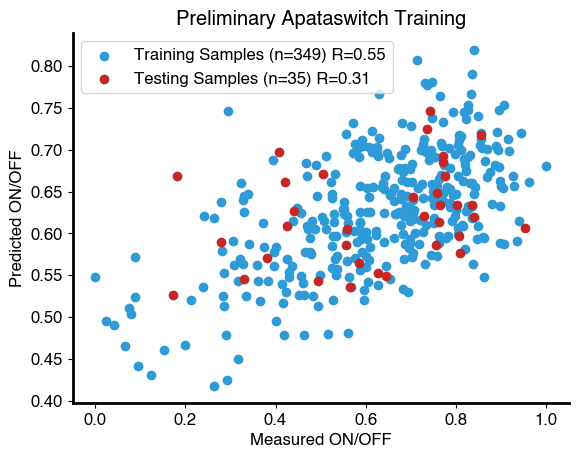

Elapsed Time: 9.061804056167603
Training Fold 75
2/2 [==============================] - 0s 1ms/step


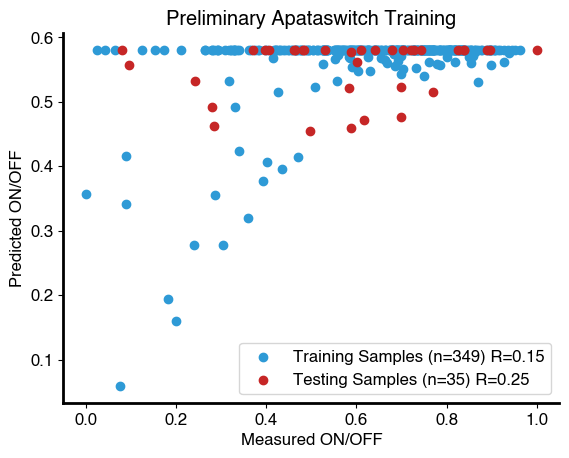

Elapsed Time: 54.456387996673584
Training Fold 76
2/2 [==============================] - 0s 1ms/step


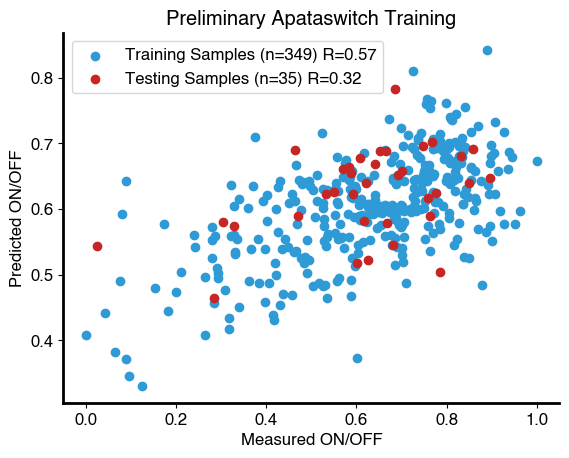

Elapsed Time: 5.748685836791992
Training Fold 77
2/2 [==============================] - 0s 2ms/step


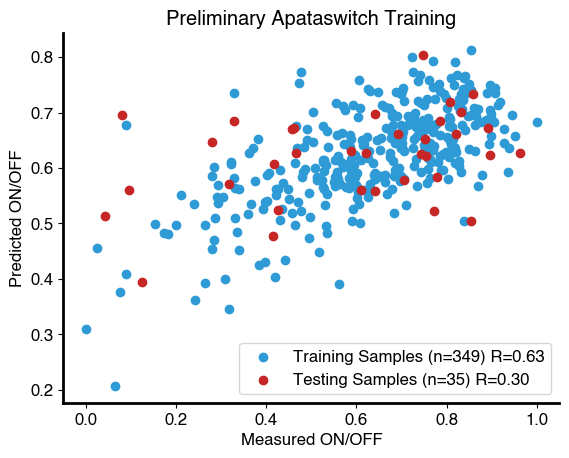

Elapsed Time: 8.09696912765503
Training Fold 78
2/2 [==============================] - 0s 1ms/step


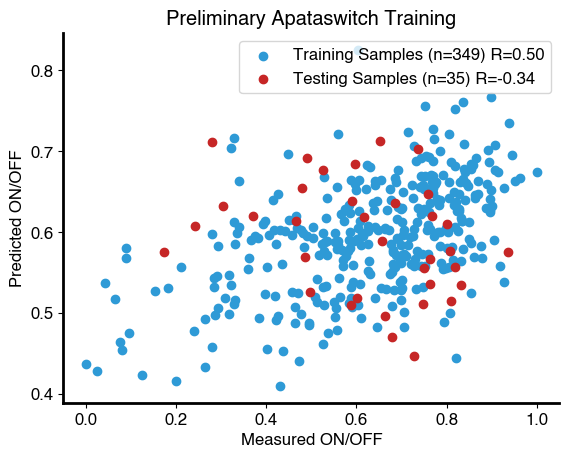

Elapsed Time: 4.681105852127075
Training Fold 79
2/2 [==============================] - 0s 2ms/step


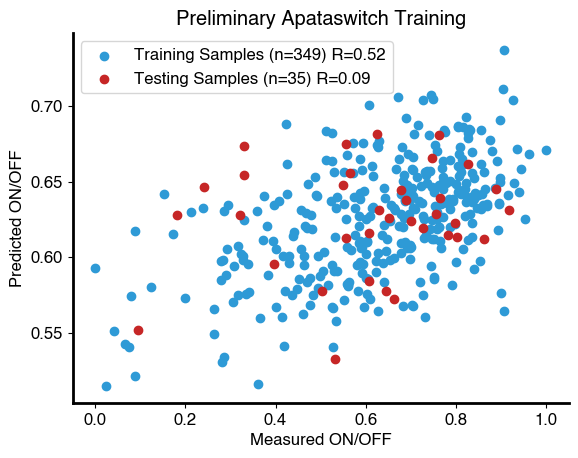

Elapsed Time: 10.047223091125488
Training Fold 80
2/2 [==============================] - 0s 1ms/step


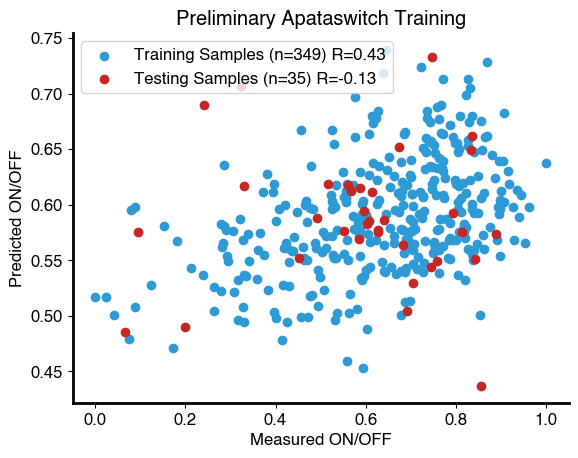

Elapsed Time: 4.866031169891357
Training Fold 81
2/2 [==============================] - 0s 1ms/step


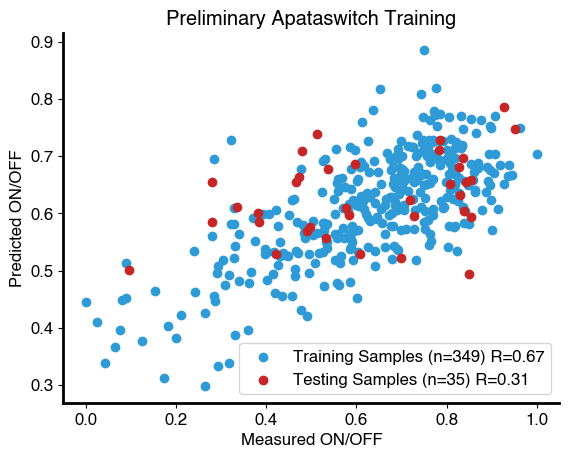

Elapsed Time: 12.004442930221558
Training Fold 82
2/2 [==============================] - 0s 1ms/step


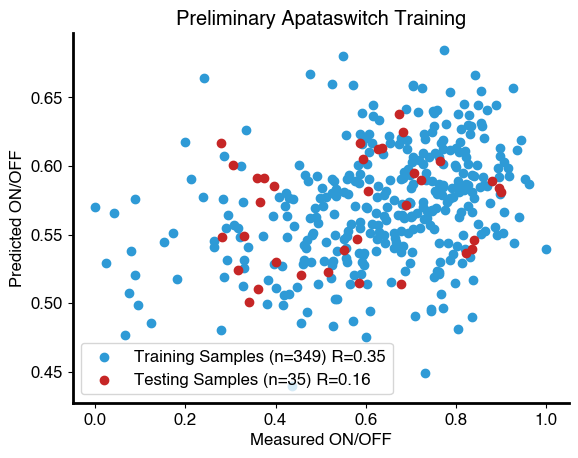

Elapsed Time: 4.848088026046753
Training Fold 83
2/2 [==============================] - 0s 1ms/step


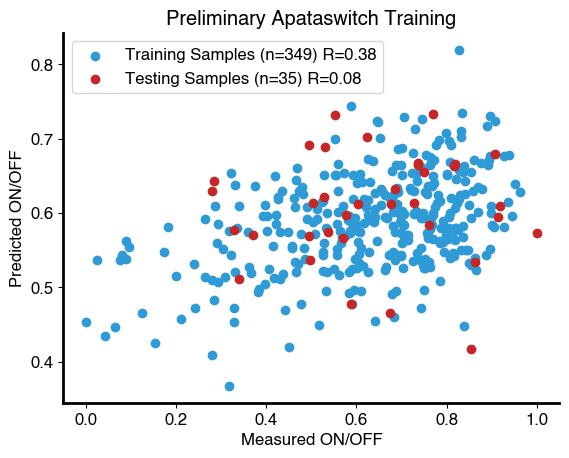

Elapsed Time: 4.805453062057495
Training Fold 84
2/2 [==============================] - 0s 2ms/step


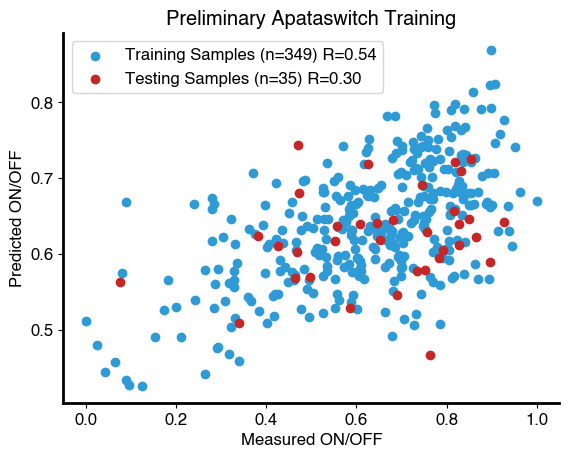

Elapsed Time: 8.034229040145874
Training Fold 85
2/2 [==============================] - 0s 2ms/step


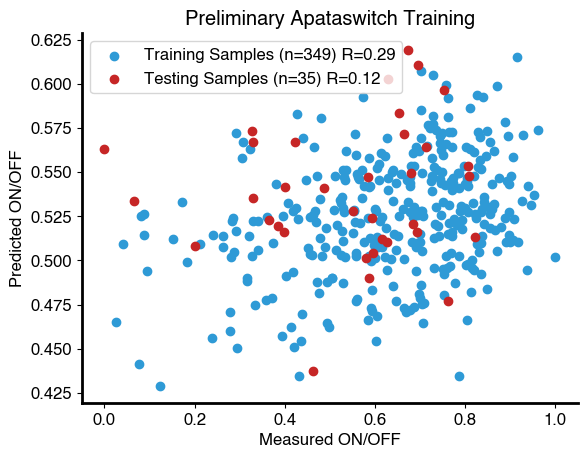

Elapsed Time: 4.406490087509155
Training Fold 86
2/2 [==============================] - 0s 1ms/step


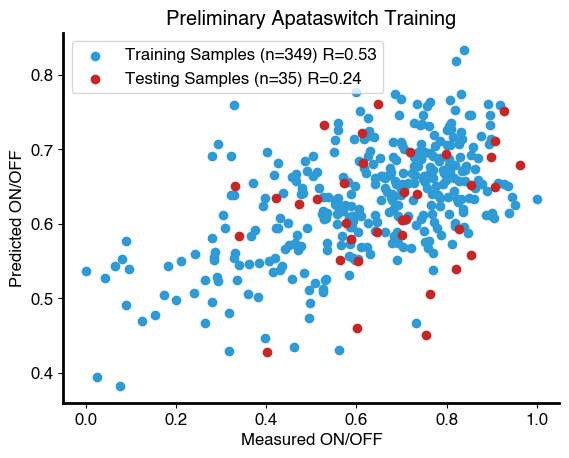

Elapsed Time: 6.305675029754639
Training Fold 87
2/2 [==============================] - 0s 2ms/step


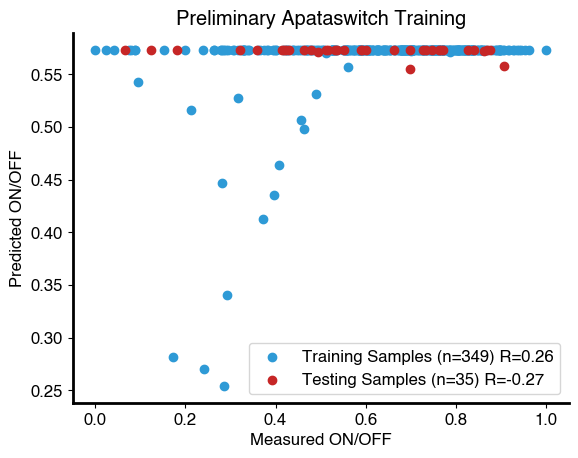

Elapsed Time: 53.95555114746094
Training Fold 88
2/2 [==============================] - 0s 2ms/step


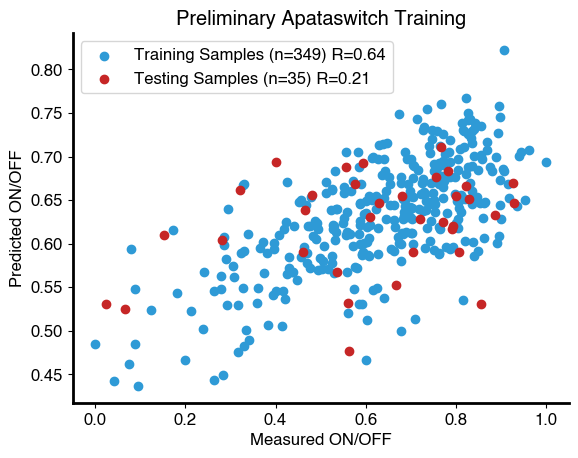

Elapsed Time: 11.511954307556152
Training Fold 89
2/2 [==============================] - 0s 1ms/step


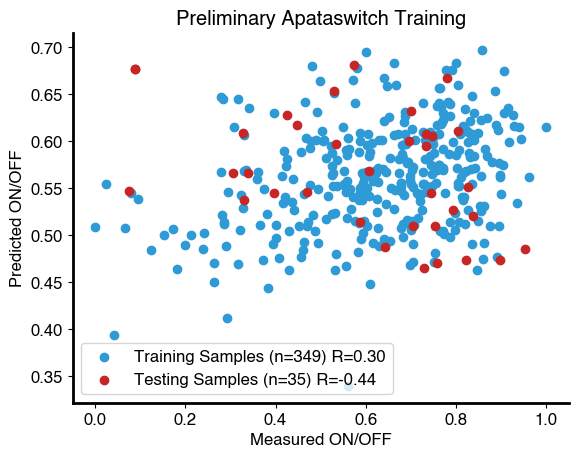

Elapsed Time: 4.566246032714844
Training Fold 90
2/2 [==============================] - 0s 2ms/step


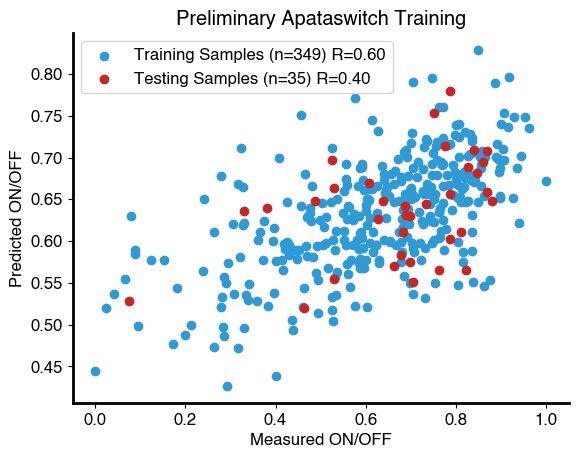

Elapsed Time: 8.251221656799316
Training Fold 91
2/2 [==============================] - 0s 1ms/step


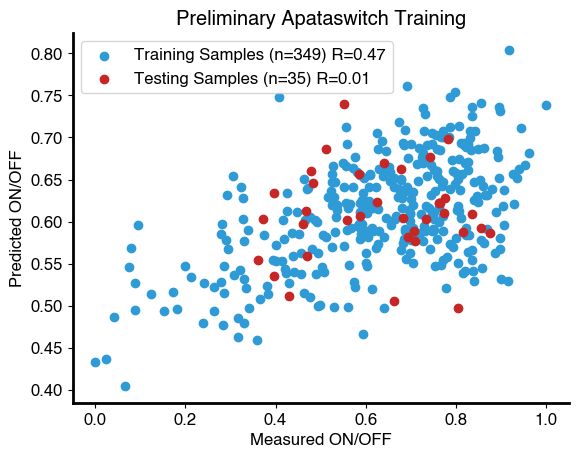

Elapsed Time: 5.57050895690918
Training Fold 92
2/2 [==============================] - 0s 2ms/step


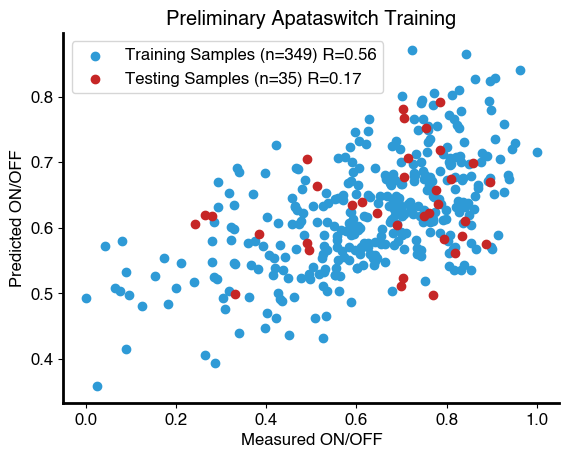

Elapsed Time: 5.925331115722656
Training Fold 93
2/2 [==============================] - 0s 2ms/step


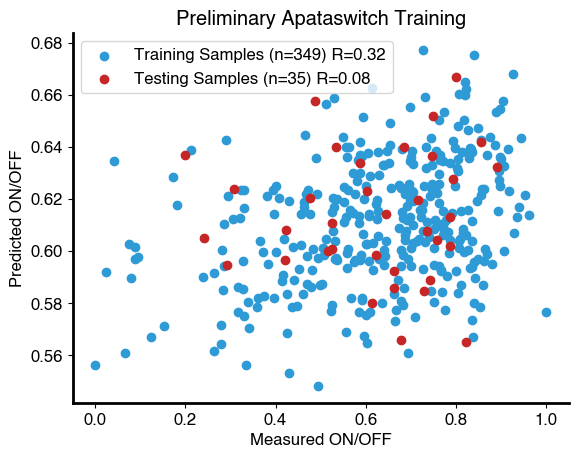

Elapsed Time: 5.055937051773071
Training Fold 94
2/2 [==============================] - 0s 2ms/step


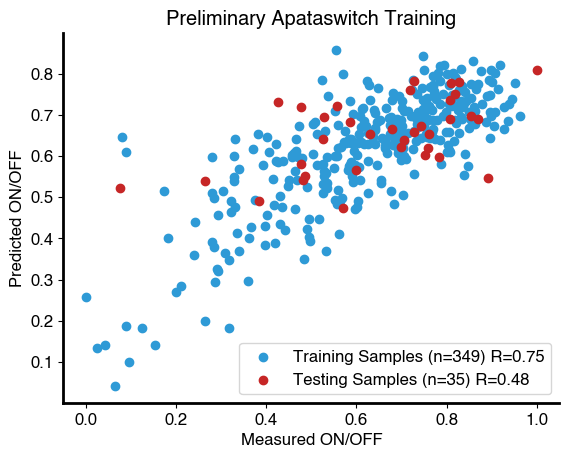

Elapsed Time: 25.244305849075317
Training Fold 95
2/2 [==============================] - 0s 1ms/step


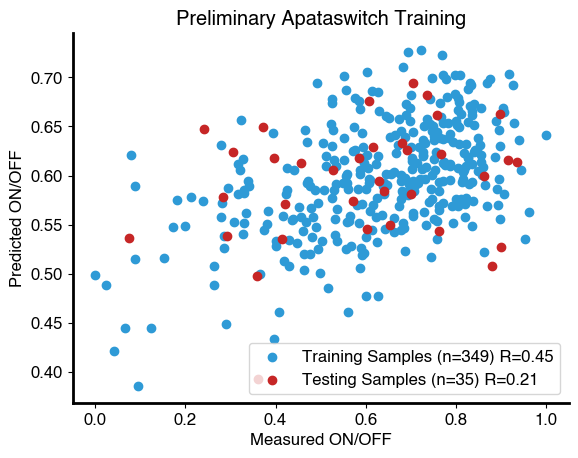

Elapsed Time: 4.962296962738037
Training Fold 96
2/2 [==============================] - 0s 1ms/step


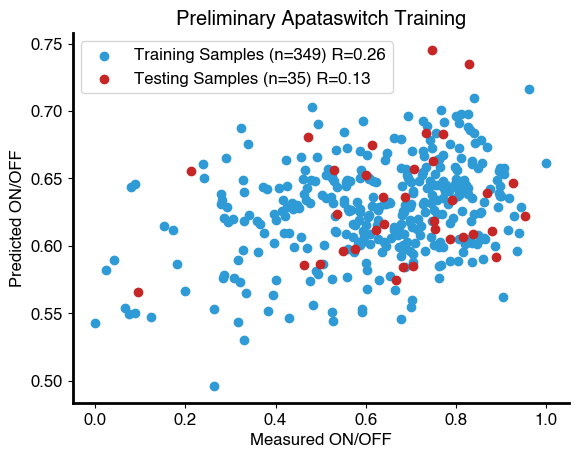

Elapsed Time: 6.255345821380615
Training Fold 97
2/2 [==============================] - 0s 2ms/step


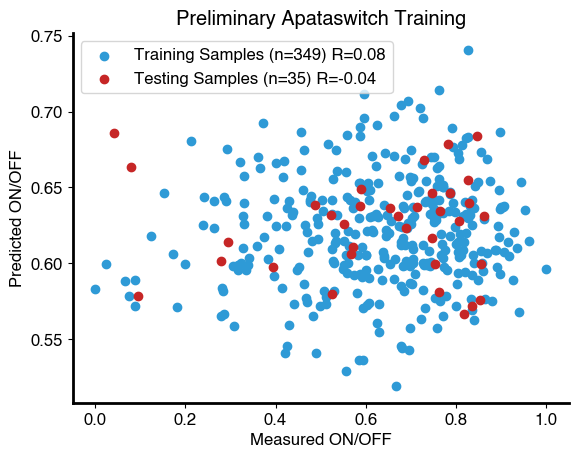

Elapsed Time: 5.185199975967407
Training Fold 98
2/2 [==============================] - 0s 1ms/step


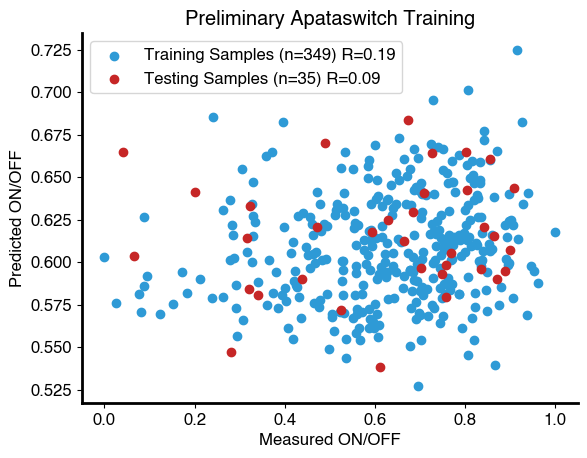

Elapsed Time: 5.232148885726929
Training Fold 99
2/2 [==============================] - 0s 2ms/step


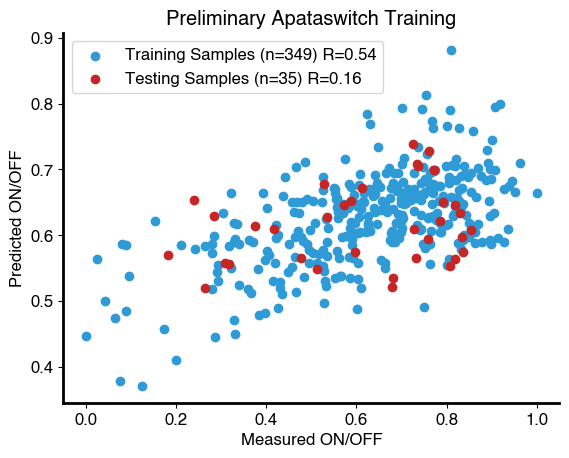

Elapsed Time: 6.2655720710754395
Training Fold 100
2/2 [==============================] - 0s 1ms/step


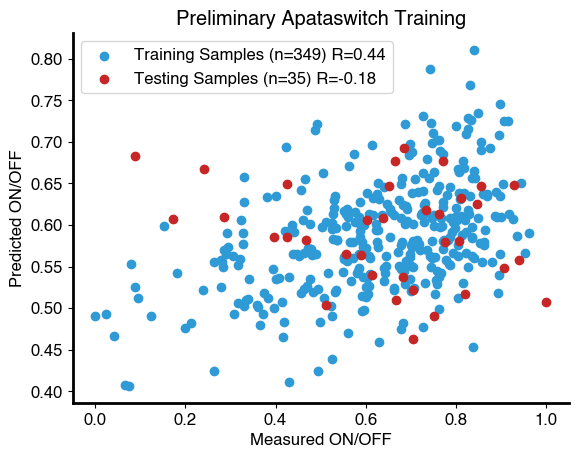

Elapsed Time: 4.967567205429077




In [98]:
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
import time

# sizes= [16,32,64,128,256]
sizes = [LATENT_DIM]
master_spearman_train_save = []
master_spearman_test_save = []
master_spearman_train_save_2 = []
master_spearman_test_save_2 = []
model_save = []
indices_train_save = []
indices_test_save = [] 

INNER = 1

for size in sizes:

    print('Model: ',size)

    spearman_save_1_train = []
    spearman_save_2_train = []

    spearman_save_1_test = []
    spearman_save_2_test = []

    # model_save_1 = []
    # model_save_2 = []

    for i in range(FOLDS):
        print('Training Fold %s'%(i+1))
        time_start = time.time()
        seq_train,seq_test,ppm_train,ppm_test,y_train,y_test,indices_train,indices_test = train_test_split(seqs,ppms,y,indices,test_size=TEST_SIZE)

        for j in range(INNER): #Things look consistent per inner split
            # seq_test = np.concatenate((seq_test,top_seqs),axis=0)
            # ppm_test = np.concatenate((ppm_test,top_ppms),axis=0)
            # y_test = np.concatenate((y_test,top_y),axis=0)

            #Figuring out if this is necessary
            # seq_train = np.concatenate((seq_train,top_seqs),axis=0)
            # ppm_train = np.concatenate((ppm_train,top_ppms),axis=0)
            # y_train = np.concatenate((y_train,top_y),axis=0)




            if PRETRAIN:
                pretrained_model = tfk.models.load_model('../SANDSTORM/tmp_models/sandstorm_apta_pretrained_nostruc_%s'%size)
                # pretrained_model = tfk.models.load_model('tmp_models/sandstorm_apta_pretrained_nostruc_%s'%size)
                # pretrained_model = tfk.models.load_model('models/apta_pretrained')
                for layer in pretrained_model.layers:
                    layer.trainable = False
                pretrained_model.layers[-1].trainable = True
                # pretrained_model.layers[-2].trainable = True
                # pretrained_model.layers[-3].trainable = True

            else:
                pretrained_model = GA_util.create_SANDSTORM(seq_len=137,ppm_len=137,latent_dim=LATENT_DIM)
                pretrained_model.compile(loss=LOSS,optimizer=OPT)

            #Train on this split
            K.set_value(pretrained_model.optimizer.learning_rate,LR_1)
            hist_1 = pretrained_model.fit([seq_train,ppm_train],
                                          y_train,
                                          validation_data=[[seq_test,ppm_test],y_test],
                                          epochs=EPOCHS,
                                          batch_size=BATCH_SIZE,
                                          callbacks=cb,
                                          verbose=False)
            # hist_1 = pretrained_model.fit(seq_train,y_train,validation_data=[seq_test,y_test],epochs=EPOCHS,batch_size=BATCH_SIZE,callbacks=cb,verbose=False)

            # model_save_1.append(pretrained_model)
            #Get the training fit
            fit_vals = pretrained_model.predict([seq_train,ppm_train])
            spearman_train = spearmanr(y_train,fit_vals)[0]

            spearman_save_1_train.append(spearman_train)

            #Get the testing fit
            preds = pretrained_model.predict([seq_test,ppm_test])
            # preds = pretrained_model.predict(seq_test)
            spearman_test = spearmanr(y_test,preds)[0]

            spearman_save_1_test.append(spearman_test)




            plt.figure()
            plt.title('Preliminary Apataswitch Training')
            plt.scatter(y_train[:,0],fit_vals[:,0],color=util.BLUE)
            plt.scatter(y_test[:,0],preds[:,0],color=util.RED)
            # plt.scatter(y_val[:,0],val_preds[:,0])
            plt.xlabel('Measured ON/OFF')
            plt.ylabel('Predicted ON/OFF')
            plt.legend(['Training Samples (n=%s) R=%.2f'%(seq_train.shape[0],spearman_train),'Testing Samples (n=%s) R=%.2f'%(seq_test.shape[0],spearman_test)])
            util.neat_plot()
            plt.show()
            
        model_save.append(pretrained_model)
        indices_train_save.append(indices_train)
        indices_test_save.append(indices_test)

        print('Elapsed Time:',time.time() -time_start)
    master_spearman_train_save.append(spearman_save_1_train)
    master_spearman_test_save.append(spearman_save_1_test)

    # master_spearman_train_save_2.append(spearman_save_2_train)
    # master_spearman_test_save_2.append(spearman_save_2_test)
    print('\n')

In [ ]:
# saves = [2,4,5]

# for i in range(len(model_save)):
#     model = model_save[i]
#     print(model)
    
#     model.save('/Users/aidanriley/Dropbox/colab_notebooks/DIGS/ml/aptamer/models/big_screen_linear_on_off_%s'%i)

In [12]:
print(spearman_save_1_train)
# print(spearman_save_2_train)

[0.9907041906505667, 0.9363093900943574, 0.8905595022138056, 0.8850863017812701, nan, 0.8448656539281262, 0.7674736851428245, 0.6459418395963218, 0.9281846150377744, 0.8644150988060185, 0.8839915972814356, 0.6990590018027681, 0.7963537225669678, 0.8584159635549394, 0.8233251930990783, 0.9324909680437433, 0.7168799150388212, 0.8439996167407018, nan, 0.9416534418053768, 0.8598961818194994, 0.7559910433268197, 0.6451849829989075, 0.9235867917251419, 0.8008800470861425, 0.6900198795631811, 0.5295160385159492, 0.6649779102545214, 0.7154505833029383, 0.9122845072259677, 0.8606874995470938, 0.6747230025628453, 0.9252650809715787, 0.8987628615298651, 0.8776797353256376, 0.8829938348393974, nan, 0.8763541090469325, 0.7230436263415083, 0.952805643251617, 0.8671442914896308, 0.7646581786004434, 0.8053107178140695, 0.9103157138727789, 0.8600839466689856, 0.775131141508834, nan, 0.6363436096745597, nan, 0.8996504771819814, 0.9051201348815078, nan, 0.8551785497178294, 0.8756658526432413, 0.918081706

In [13]:
print(spearman_save_1_test)
# print(spearman_save_2_test)

[0.16840336134453782, 0.1371908763505402, 0.2024969987995198, 0.11884753901560624, nan, -0.019735894357743092, 0.10645858343337333, 0.005810324129651861, 0.2242016806722689, 0.15553421368547415, 0.03807923169267707, 0.24667466986794717, 0.24648259303721487, 0.1427611044417767, 0.16600240096038413, 0.10722689075630251, 0.20720288115246097, 0.19394957983193276, nan, 0.04643457382953182, 0.3250420168067227, 0.07611044417767106, -0.07841536614645858, -0.13939975990396156, 0.3247539015606243, 0.04470588235294118, -0.09301320528211285, 0.29968787515006, 0.0168547418967587, 0.06304921968787515, 0.16619447779111643, 0.25656662665066027, 0.18098439375750297, 0.02348139255702281, -0.10434573829531814, 0.184921968787515, nan, 0.2838415366146458, -0.23380552220888354, 0.14593037214885954, 0.08120048019207683, 0.01205282112845138, 0.3071788715486194, 0.1454501800720288, 0.1287394957983193, 0.1505402160864346, nan, 0.2221848739495798, nan, -0.17675870348139258, -0.0114765906362545, nan, 0.0669867947

In [14]:
print(master_spearman_train_save)
print(np.nanmedian(master_spearman_train_save[0]))

[[0.9907041906505667, 0.9363093900943574, 0.8905595022138056, 0.8850863017812701, nan, 0.8448656539281262, 0.7674736851428245, 0.6459418395963218, 0.9281846150377744, 0.8644150988060185, 0.8839915972814356, 0.6990590018027681, 0.7963537225669678, 0.8584159635549394, 0.8233251930990783, 0.9324909680437433, 0.7168799150388212, 0.8439996167407018, nan, 0.9416534418053768, 0.8598961818194994, 0.7559910433268197, 0.6451849829989075, 0.9235867917251419, 0.8008800470861425, 0.6900198795631811, 0.5295160385159492, 0.6649779102545214, 0.7154505833029383, 0.9122845072259677, 0.8606874995470938, 0.6747230025628453, 0.9252650809715787, 0.8987628615298651, 0.8776797353256376, 0.8829938348393974, nan, 0.8763541090469325, 0.7230436263415083, 0.952805643251617, 0.8671442914896308, 0.7646581786004434, 0.8053107178140695, 0.9103157138727789, 0.8600839466689856, 0.775131141508834, nan, 0.6363436096745597, nan, 0.8996504771819814, 0.9051201348815078, nan, 0.8551785497178294, 0.8756658526432413, 0.91808170

In [15]:
print(master_spearman_test_save)
print(np.nanmedian(master_spearman_test_save[0]))

[[0.16840336134453782, 0.1371908763505402, 0.2024969987995198, 0.11884753901560624, nan, -0.019735894357743092, 0.10645858343337333, 0.005810324129651861, 0.2242016806722689, 0.15553421368547415, 0.03807923169267707, 0.24667466986794717, 0.24648259303721487, 0.1427611044417767, 0.16600240096038413, 0.10722689075630251, 0.20720288115246097, 0.19394957983193276, nan, 0.04643457382953182, 0.3250420168067227, 0.07611044417767106, -0.07841536614645858, -0.13939975990396156, 0.3247539015606243, 0.04470588235294118, -0.09301320528211285, 0.29968787515006, 0.0168547418967587, 0.06304921968787515, 0.16619447779111643, 0.25656662665066027, 0.18098439375750297, 0.02348139255702281, -0.10434573829531814, 0.184921968787515, nan, 0.2838415366146458, -0.23380552220888354, 0.14593037214885954, 0.08120048019207683, 0.01205282112845138, 0.3071788715486194, 0.1454501800720288, 0.1287394957983193, 0.1505402160864346, nan, 0.2221848739495798, nan, -0.17675870348139258, -0.0114765906362545, nan, 0.066986794

(array([ 3.,  2.,  4.,  8., 19., 17., 15., 12.,  6.,  3.]),
 array([-0.24388956, -0.17580792, -0.10772629, -0.03964466,  0.02843697,
         0.09651861,  0.16460024,  0.23268187,  0.30076351,  0.36884514,
         0.43692677]),
 <BarContainer object of 10 artists>)

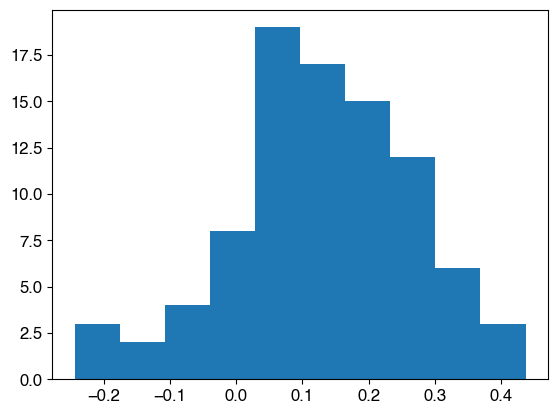

In [16]:
plt.hist(master_spearman_test_save)

Text(0.5, 1.0, 'Cross Fold Training results')

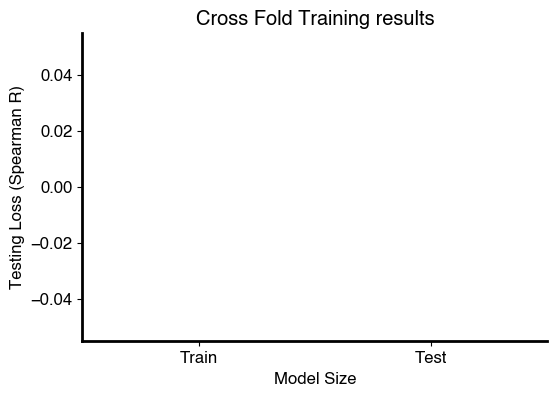

In [17]:
LW = 1.5

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

# colors = ['cyan', 'firebrick', 'cyan', 'firebrick']
# colors = ['firebrick' for i in range(len(sizes))]
colors = ['cyan','firebrick']
labels= ['Train','Test']
# data = [spearman_save_1_train,spearman_save_1_test,spearman_save_2_train,spearman_save_2_test]
data = [master_spearman_train_save[0],master_spearman_test_save[0]]
# data_test = master_spearman_test_save
# data_train = master_spearman_train_save


bplot = ax.boxplot(data,vert=True,patch_artist=True,labels=labels)

# bplo_2 = ax.boxplot(data_test,vert=True,patch_artist=True)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_linewidth(LW)
    
for whisker in bplot['whiskers']:
    whisker.set_linewidth(LW)
    
for cap in bplot['caps']:
    cap.set_linewidth(LW)
    
for median in bplot['medians']:
    median.set_color('black')
    median.set_linewidth(LW)
    
util.neat_plot()
plt.ylabel('Testing Loss (Spearman R)')
plt.xlabel('Model Size')
plt.title('Cross Fold Training results')
# plt.ylim([0,1])

Text(0.5, 1.0, 'Cross Fold Training results')

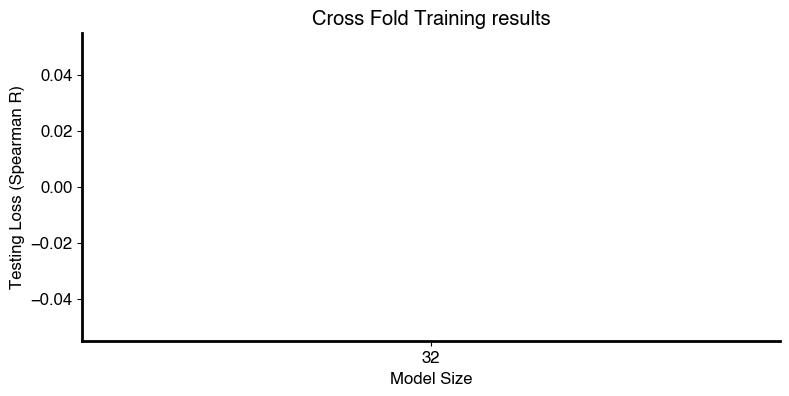

In [18]:
LW = 1.5

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# colors = ['cyan', 'firebrick', 'cyan', 'firebrick']
colors = ['firebrick' for i in range(len(sizes))]
labels= sizes
# data = [spearman_save_1_train,spearman_save_1_test,spearman_save_2_train,spearman_save_2_test]
data = master_spearman_test_save


bplot = ax.boxplot(data,vert=True,patch_artist=True,labels=labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_linewidth(LW)
    
for whisker in bplot['whiskers']:
    whisker.set_linewidth(LW)
    
for cap in bplot['caps']:
    cap.set_linewidth(LW)
    
for median in bplot['medians']:
    median.set_color('black')
    median.set_linewidth(LW)
    
util.neat_plot()
plt.ylabel('Testing Loss (Spearman R)')
plt.xlabel('Model Size')
plt.title('Cross Fold Training results')

Text(0.5, 1.0, 'Cross Fold Training results')

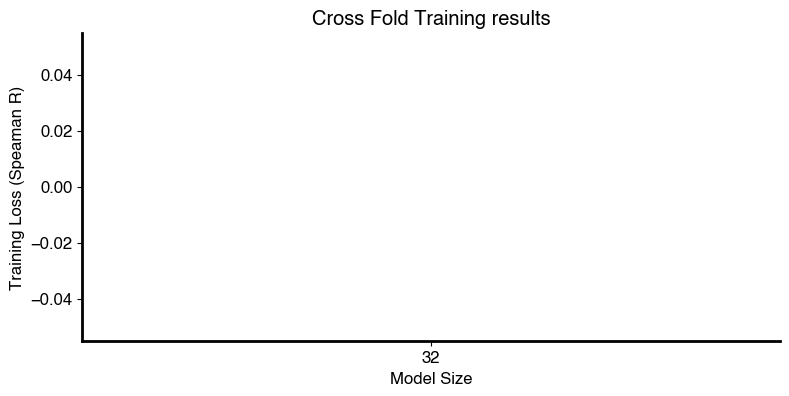

In [19]:
LW = 1.5

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# colors = ['cyan', 'firebrick', 'cyan', 'firebrick']
colors = ['cyan' for i in range(len(sizes))]
labels= sizes
# data = [spearman_save_1_train,spearman_save_1_test,spearman_save_2_train,spearman_save_2_test]
data = master_spearman_train_save


bplot = ax.boxplot(data,vert=True,patch_artist=True,labels=labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_linewidth(LW)
    
for whisker in bplot['whiskers']:
    whisker.set_linewidth(LW)
    
for cap in bplot['caps']:
    cap.set_linewidth(LW)
    
for median in bplot['medians']:
    median.set_color('black')
    median.set_linewidth(LW)
    
util.neat_plot()
plt.ylabel('Training Loss (Speaman R)')
plt.xlabel('Model Size')
plt.title('Cross Fold Training results')

In [20]:
len(master_spearman_train_save[0])

100

In [31]:
np.save('/Users/aidanriley/Dropbox/colab_notebooks/DIGS/ml/aptamer/stat_tests/training_indices_on_off.npy',indices_train_save)
np.save('/Users/aidanriley/Dropbox/colab_notebooks/DIGS/ml/aptamer/stat_tests/testing_indices_on_off.npy',indices_test_save)

np.save('/Users/aidanriley/Dropbox/colab_notebooks/DIGS/ml/aptamer/stat_tests/spearmans_train_on_off.npy',master_spearman_train_save)
np.save('/Users/aidanriley/Dropbox/colab_notebooks/DIGS/ml/aptamer/stat_tests/spearmans_test_on_off.npy',master_spearman_test_save)

In [12]:
indices_train_save = np.load('stat_tests/training_indices_non_linear_on_off.npy')
indices_test_save = np.load('stat_tests/testing_indices_non_linear_on_off.npy')

master_spearman_train_save = np.load('stat_tests/spearmans_train_non_linear_on_off.npy')
master_spearman_test_save = np.load('stat_tests/spearmans_test_non_linear_on_off.npy')

In [13]:
indices_test_save.shape

(100, 35)

In [46]:
from scipy.special import rel_entr
from scipy.stats import kstest
ks_save = []

for train_group,test_group in zip(indices_train_save,indices_test_save):
    y_train_tmp = y[train_group][:,0]
    y_test_tmp = y[test_group][:,0]
    
    # sample_train = np.random.choice(y_train_tmp,replace=True,size=100000)
    # sample_test = np.random.choice(y_test_tmp,replace=True,size=100000)
    

    ks = kstest(y_test_tmp,y_train_tmp)
    ks_save.append(ks.pvalue)

In [47]:
len(master_spearman_test_save[0])

100

In [48]:
ks

KstestResult(statistic=0.11005988023952096, pvalue=0.6240214985253804, statistic_location=0.686574738928974, statistic_sign=1)

SignificanceResult(statistic=nan, pvalue=nan)


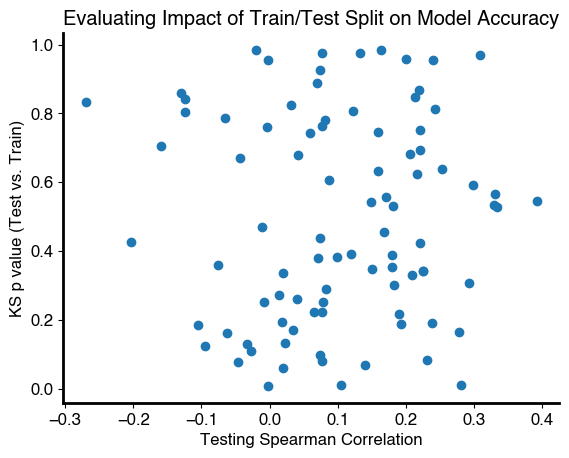

In [49]:
# ks_save
plt.figure()
plt.title('Evaluating Impact of Train/Test Split on Model Accuracy')
plt.scatter(master_spearman_test_save[0],ks_save)
plt.xlabel('Testing Spearman Correlation')
plt.ylabel('KS p value (Test vs. Train)')
util.neat_plot()

print(spearmanr(master_spearman_test_save[0],ks_save))

In [50]:
np.nanmean(master_spearman_train_save)

0.8414389177812959

In [51]:
np.nanmean(master_spearman_test_save)

0.10238612298852123

SignificanceResult(statistic=nan, pvalue=nan)


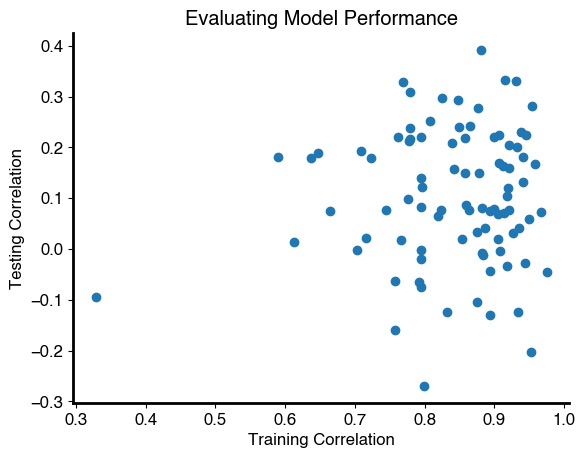

In [52]:


plt.figure()
plt.title('Evaluating Model Performance')
plt.scatter(master_spearman_train_save,master_spearman_test_save)
plt.ylabel('Testing Correlation')
plt.xlabel('Training Correlation')
util.neat_plot()

print(spearmanr(master_spearman_train_save[0],master_spearman_test_save[0]))

In [53]:
labels = ['lucky','overfit','underfit','good']

In [54]:
# 0.6 training 0.25 testing
#labeling to see if some samples are over-represented in specific groups 

val_upper = 0.6
val_lower = 0.2
label_save = []
for train_val,test_val in zip(master_spearman_train_save[0],master_spearman_test_save[0]):
    print(train_val,test_val)
    
    if train_val < val_upper and test_val < val_lower:
        label_save.append('underfit')
        
    if train_val > val_upper and test_val < val_lower:
        label_save.append('overfit')
        
    if train_val > val_upper and test_val > val_lower:
        label_save.append('good')
        
    if train_val < val_upper and test_val > val_lower:
        label_save.append('lucky')

0.768252120204931 0.3284033613445378
0.6367085111745046 0.1787755102040816
0.857290340657934 0.14929171668667465
0.7954293913182107 0.22064825930372148
0.7618639284561173 0.22103241296518605
0.8996707673801247 0.22074429771908766
0.8186004755313898 0.06545018007202881
0.9214981895829157 0.20547418967587033
nan nan
0.7918943879083302 -0.0656422569027611
0.9181828356196038 0.10424969987995197
0.8987654380629625 0.07841536614645858
nan nan
0.7791692130060172 0.23755102040816325
0.6645089812307616 0.07399759903961585
0.9213406989973261 0.07726290516206481
0.6466951534607268 0.18933973589435774
0.9270203441443052 0.031068427370948382
0.7792458648656702 0.3085234093637455
0.8231490226485312 0.07620648259303721
0.8324847682609771 -0.1241296518607443
0.8776749043260796 0.1499639855942377
0.5890049670727123 0.18050420168067227
0.9211052682855347 0.1594717887154862
0.7777392371368598 0.21325330132052822
0.9492084809807575 0.059495798319327726
0.722722203837585 0.17963985594237694
0.8386426823641

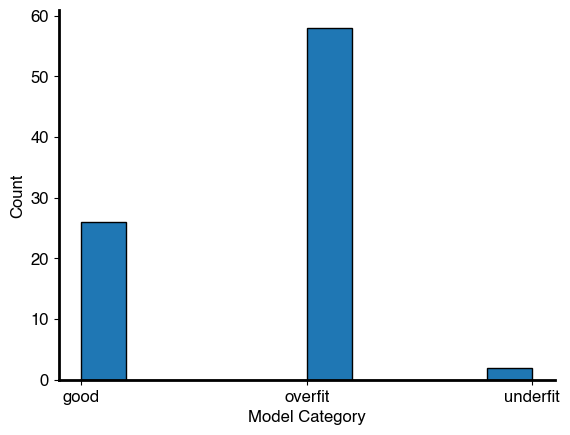

In [41]:
plt.figure()
plt.hist(label_save,edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Model Category')
util.neat_plot()

In [28]:
master_underfit = []
master_good = []
master_lucky = []
master_overfit = []

for i,index_list in enumerate(indices_train_save):
    print(index_list)
    print(label_save[i])
    print('\n')
    
    if label_save[i] == 'good':
        for j in index_list:
            master_good.append(j)
            
    if label_save[i] == 'lucky':
        for j in index_list:
            master_lucky.append(j)
            
    if label_save[i] == 'underfit':
        for j in index_list:
            master_underfit.append(j)
            
    if label_save[i] == 'overfit':
        for j in index_list:
            master_overfit.append(j)

[ 74  44 382  12 116 256 144  83 380 153  81 335   3  16 119 179 174  92
  43 150  41 265  99 289 338 329 105 242 226 168  23 106  61  36 348 253
  15 125  49 126 349 301 268 196 320 236 346 207 311 374 331 258  88 146
  53 222  56 269 312  94 270  93 287   4 233  86 187 149  70 295 228 370
 225 361 166 240 310 314 299 107  52 158  10 317  89 281 155 373 171 181
  59 284  20 358 101 308 115 291 219 307 255  75 231 309  80 175 296 313
  45  47 293 220 191   8 117 304  69  22 297  17  67 211  57 248  27 239
 234  24 128 138 205 151 148  55 342 241 285 250  64 109   1 237 134 131
 154  95 376 261 343 177 136 353 203 277 357 235 263  76 271 274 147 359
  50 143  72 266 163 161 257 326 169  62 172 377 133 264 371 360 118 318
  48  71  96 375 333 184 188  84 152 322 273 276  34 283   0 102 108 212
 208 337 249 365  14 327 339 121  37  39 201  42  90 323 139 251 267   7
 199  30 356  46 259 341 100 180 355 170 238 379 156 214 350  98  21 160
 244 345 319  38 254 352 298 200 142  66 230 193 12

IndexError: list index out of range

In [107]:
possible_values = np.arange(0,384)

In [152]:
# np.save('stat_tests/label_save.npy',label_save)

In [109]:
from scipy.stats import hypergeom
def overrepresented_lists(master_list, *sample_lists, alpha=0.05):
    overrepresented = []
    for i, sample_list in enumerate(sample_lists, 1):
        M = len(master_list)
        n = len(set(sample_list))  # Unique values in the sample list
        N = len(sample_list)
        successes = sum(1 for value in set(sample_list) if value in master_list)

        p_value = hypergeom.sf(successes - 1, M, n, N)

        if p_value < alpha:
            overrepresented.append(f"List {i}")

    return overrepresented

over_test = overrepresented_lists(possible_values,master_good,master_lucky,master_underfit,master_overfit)

In [110]:
over_test

[]

(array([ 993.,  968.,  977.,  991.,  961.,  960.,  997.,  953.,  969.,
        1003.]),
 array([  0. ,  38.3,  76.6, 114.9, 153.2, 191.5, 229.8, 268.1, 306.4,
        344.7, 383. ]),
 <BarContainer object of 10 artists>)

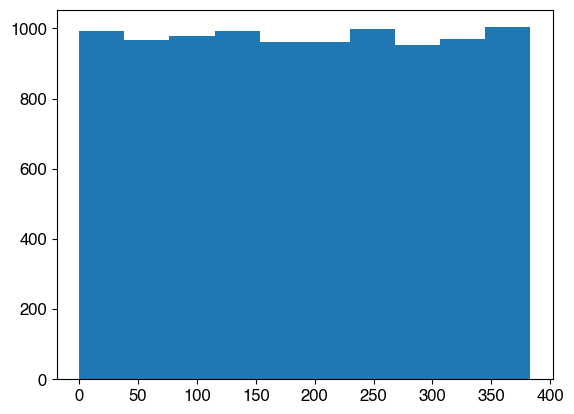

In [116]:
plt.hist(master_good)

(array([1030., 1008., 1001., 1022., 1012., 1005., 1023., 1008.,  989.,
        1023.]),
 array([  0. ,  38.3,  76.6, 114.9, 153.2, 191.5, 229.8, 268.1, 306.4,
        344.7, 383. ]),
 <BarContainer object of 10 artists>)

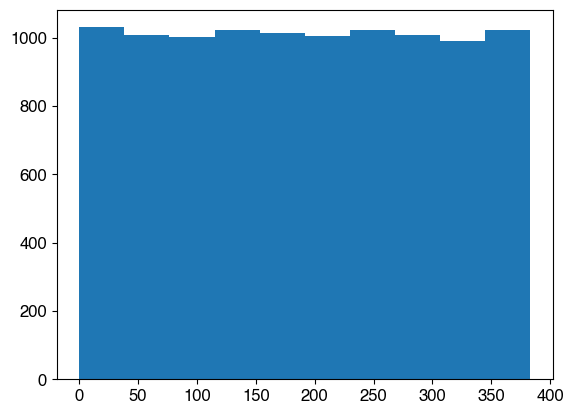

In [117]:
plt.hist(master_underfit)

(array([1030., 1008., 1001., 1022., 1012., 1005., 1023., 1008.,  989.,
        1023.]),
 array([  0. ,  38.3,  76.6, 114.9, 153.2, 191.5, 229.8, 268.1, 306.4,
        344.7, 383. ]),
 <BarContainer object of 10 artists>)

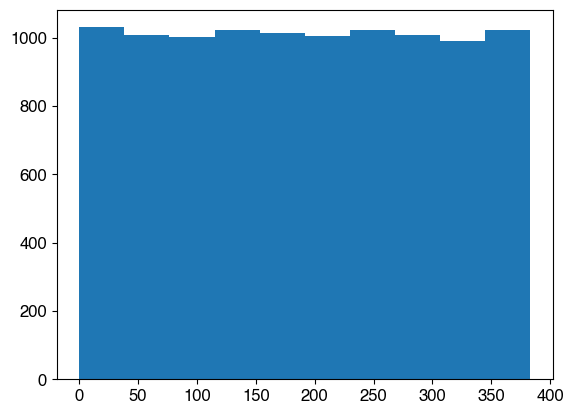

In [118]:
plt.hist(master_underfit)

(array([107., 104., 102., 107.,  98., 105., 109., 103., 103., 109.]),
 array([  0. ,  38.3,  76.6, 114.9, 153.2, 191.5, 229.8, 268.1, 306.4,
        344.7, 383. ]),
 <BarContainer object of 10 artists>)

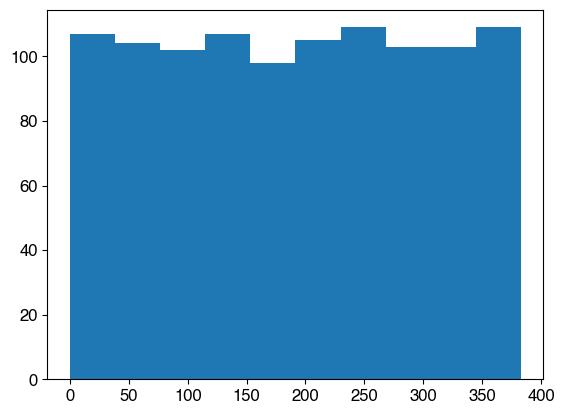

In [119]:
plt.hist(master_overfit)

In [122]:
def hyper(possible_categories, sample, alpha=0.05):
    overrepresented = []
    M = len(possible_categories)
    n = len(set(sample))  # Unique categories in the sample
    N = len(sample)
    
    for category in set(possible_categories):
        successes = sample.count(category)
        p_value = hypergeom.sf(successes - 1, M, n, N)
        
        if p_value < alpha:
            overrepresented.append(category)
            
    return overrepresented

tmp = hyper(possible_values,master_overfit)
print(tmp)

[]
